# Análisis predictivo de series temporales
------

## Análisis exploratorio, regresión lineal y no lineal.

In [1]:
#install.packages("devtools")     # only need to do this once
#devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=9) #ajusta tamaño de graficas


En el cuaderno anterior vimos el el **Modelo de Regresión Lineal:**

$$x_t = \beta_1z_{t_1} + \ldots + \beta_qz_{t_q} + w_t.$$


En el modelo:

$$x_t = \beta_1z_{t_1} + \ldots + \beta_qz_{t_q} + w_t.$$

* $\beta_1\ldots\beta_q$ son los parámetros a ajustar
* $z_{t_i}$ son las funciones de regresión a usar, evaluadas en cada $t$.
* $w_t$ es ruido blanco (gaussiano) de varianza $\sigma_w^2$. 

Usando el comando `lm` en R se ajustan modelos lineales como el anterior.

Vimos además algunos de sus usos:

 * Ajustar funciones de tendencia a series temporales.
 * Ajustar funciones periódicas (Ej. 2) para desestacionalizar (más sobre estoy hoy)
 * Hacer regresión con "factores" que representen fenómenos especiales (ej: trimestres)
 
Queremos ahora estudiar:

 * El uso de modelos lineales para hallar relaciones *entre series* que permitan explicar una a partir de otra.
 * El uso de modelos lineales para hallar relaciones *intra serie* que permitan por ejemplo realizar predicciones.
 * Algunos casos de regresion no lineal.

## Ejemplo: relación entre mortalidad, temperatura y polución.

El ejemplo, tomado del libro de Shumway, consiste en tres series:

* $M_t = $ mortalidad semanal reportada en Los Angeles durante 10 años.
* $T_t = $ temperatura media registrada en Farenheit.
* $P_t = $ conteo de niveles de partículas en el aire.

Grafiquemos las 3 series:


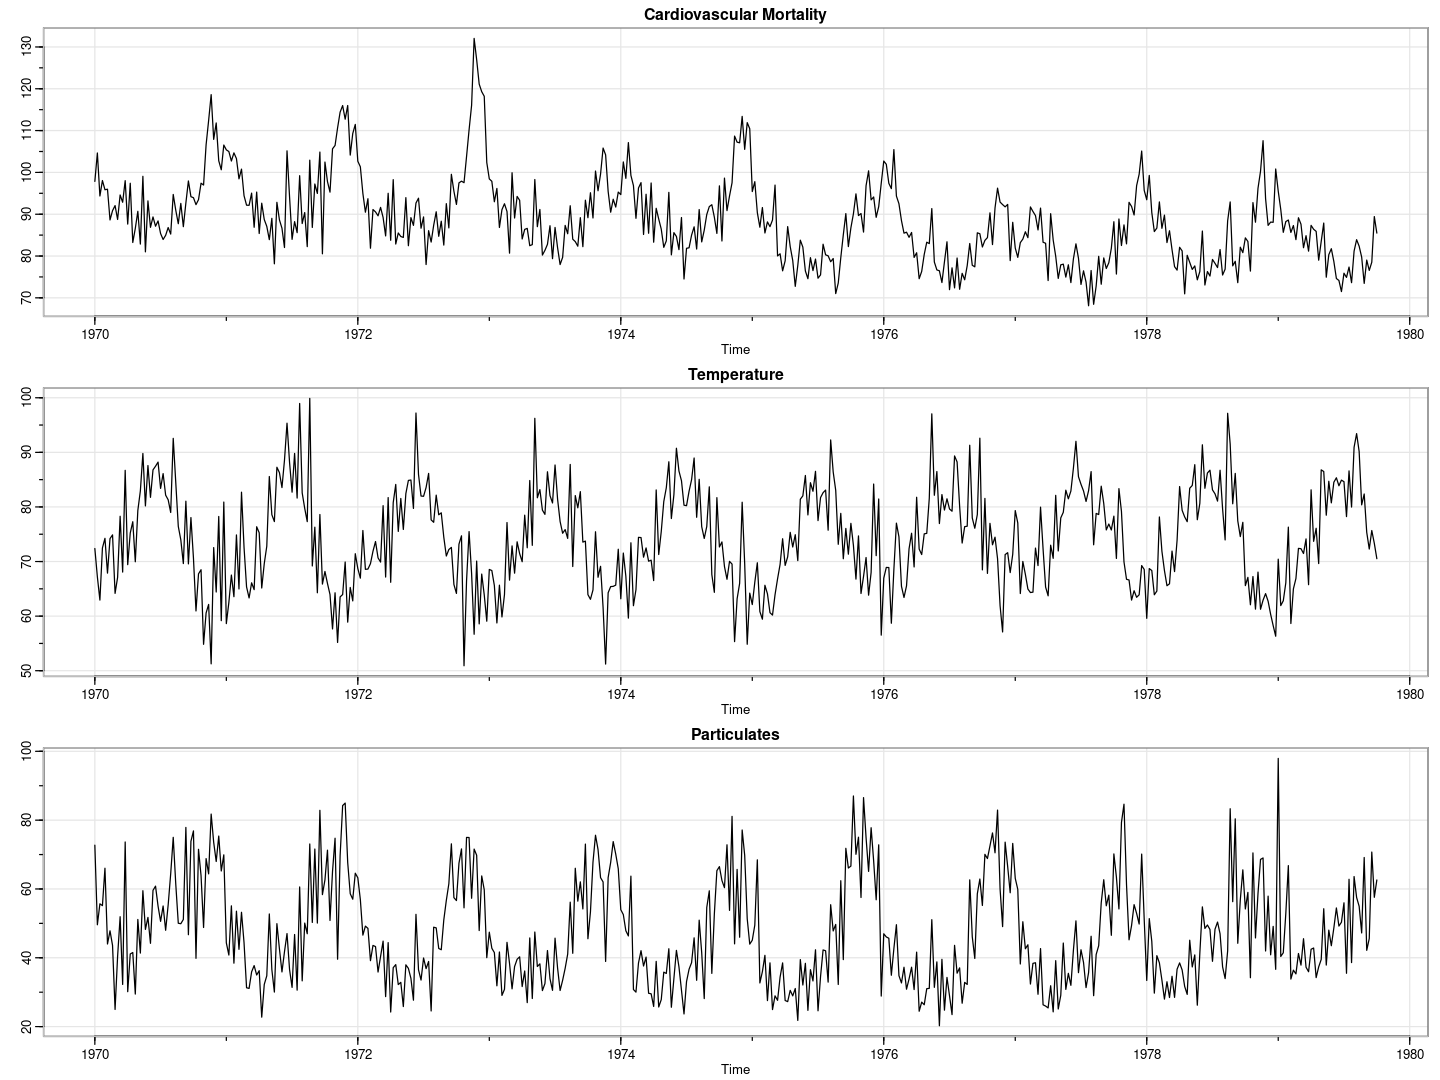

In [2]:
par(mfrow=c(3,1))
M=cmort;
T=tempr;
P=part;

tsplot(M, main="Cardiovascular Mortality", ylab="")
tsplot(T, main="Temperature",  ylab="")
tsplot(P, main="Particulates", ylab="")

### Observaciones:

* Se ve una tendencia decreciente de mortalidad.
* Se ven ciclos estacionales claros (anuales)
* Mortalidad y temperatura parecen estar "en contrafase" -> la gente muere más en invierno?
* Temperatura y partículoas parecen estar "en contrafase" también -> la lluvia en invierno limpia?

Para analizar estas relaciones se puede hacer un gráfico de correlaciones, con el comando `pairs` de R.

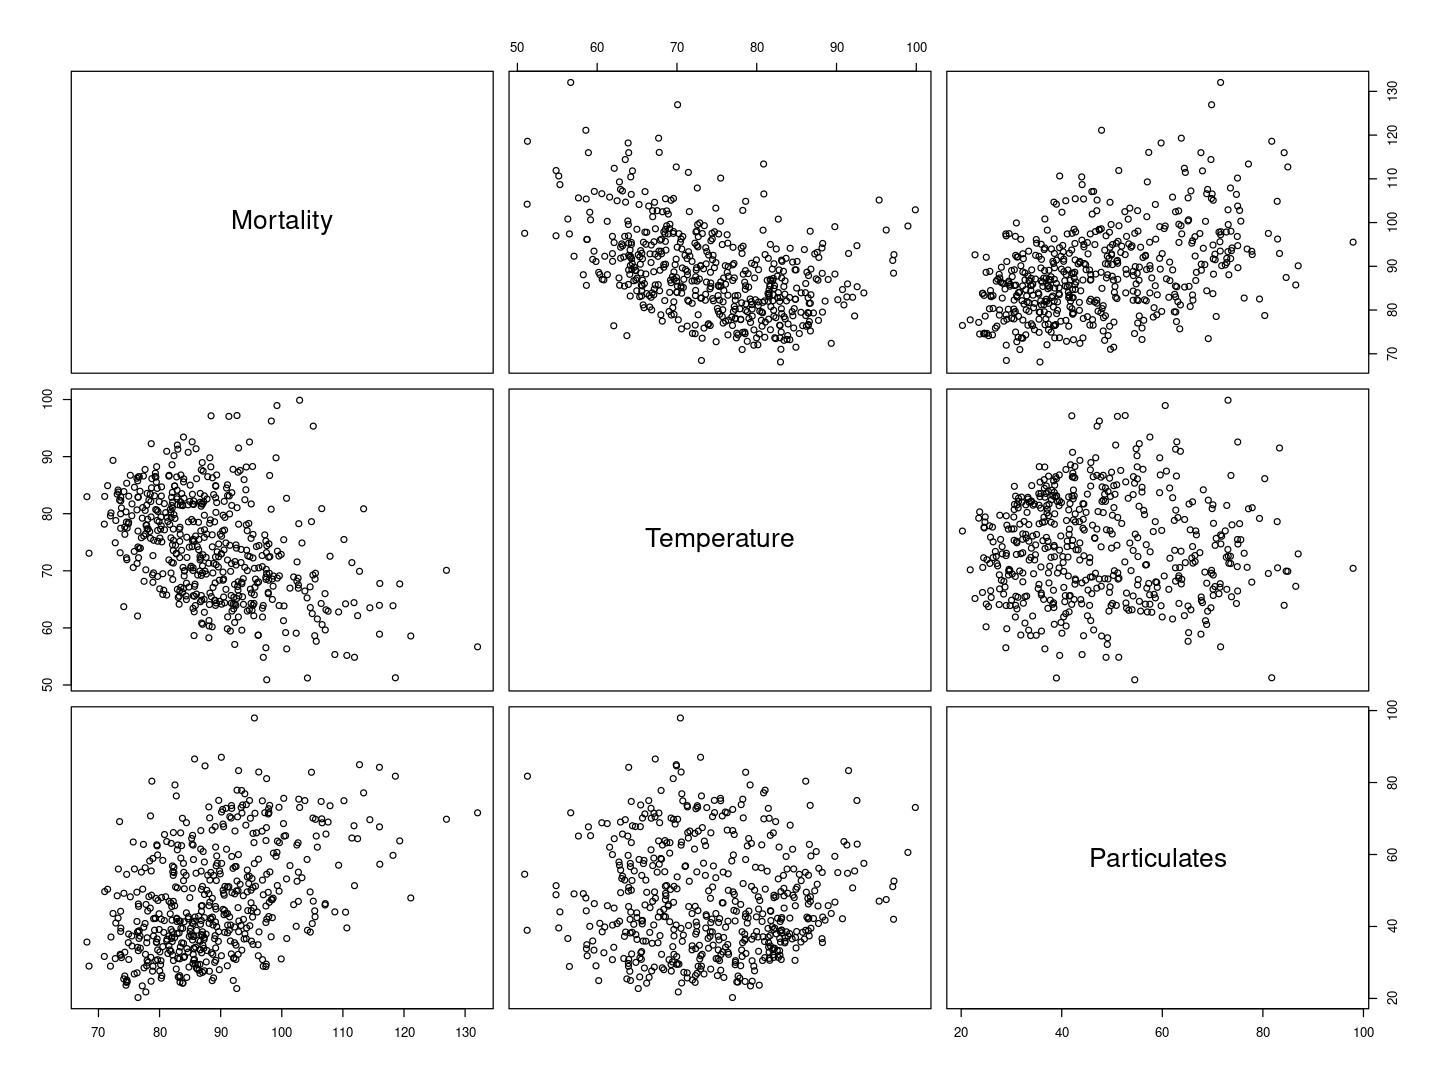

In [3]:
pairs(cbind(Mortality=M, Temperature=T, Particulates=P))

Se propone entonces ajustar algunos modelos que buscan explicar la serie de mortalidad *a partir de las otras*:

1. $M_t = \beta_0 + \beta_1 t + w_t.$
2. $M_t = \beta_0 + \beta_1 t + \beta_2(T_t - \bar{T}) + w_t.$
3. $M_t = \beta_0 + \beta_1 t + \beta_2(T_t - \bar{T}) + \beta_3(T_t - \bar{T})^2 + w_t.$
4. $M_t = \beta_0 + \beta_1 t + \beta_2(T_t - \bar{T}) + \beta_3(T_t - \bar{T})^2 + \beta_4 P_t + w_t.$


In [4]:
#  Modelo 1
trend = time(M)        # time

fit = lm(M ~ trend, na.action=NULL)
            
summary(fit)       # regression results

num = length(M)                                         # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 


Call:
lm(formula = M ~ trend, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.445  -6.670  -1.366   5.505  40.107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3297.6062   276.3132   11.93   <2e-16 ***
trend         -1.6249     0.1399  -11.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.893 on 506 degrees of freedom
Multiple R-squared:  0.2104,	Adjusted R-squared:  0.2089 
F-statistic: 134.9 on 1 and 506 DF,  p-value: < 2.2e-16


[1] 5.37846

[1] 5.403443

In [5]:
#  Modelo 2
temp  = T-mean(T)  # center temperature    
trend = time(M)        # time

fit = lm(M ~ trend + temp , na.action=NULL)
            
summary(fit)       # regression results

num = length(M)                                         # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 


Call:
lm(formula = M ~ trend + temp, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.846  -5.330  -1.207   4.701  33.306 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3125.75988  245.48233   12.73   <2e-16 ***
trend         -1.53785    0.12430  -12.37   <2e-16 ***
temp          -0.45792    0.03893  -11.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.887 on 505 degrees of freedom
Multiple R-squared:  0.3802,	Adjusted R-squared:  0.3778 
F-statistic: 154.9 on 2 and 505 DF,  p-value: < 2.2e-16


[1] 5.14025

[1] 5.173561

In [6]:
#  Modelo 3
temp  = T-mean(T)  # center temperature    
temp2 = temp^2             # square it  
trend = time(M)        # time

fit = lm(M ~ trend + temp + temp2, na.action=NULL)
            
summary(fit)       # regression results

num = length(M)                                         # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 


Call:
lm(formula = M ~ trend + temp + temp2, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.464  -4.858  -0.945   4.511  34.939 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.038e+03  2.322e+02  13.083  < 2e-16 ***
trend       -1.494e+00  1.176e-01 -12.710  < 2e-16 ***
temp        -4.808e-01  3.689e-02 -13.031  < 2e-16 ***
temp2        2.583e-02  3.287e-03   7.858 2.38e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.452 on 504 degrees of freedom
Multiple R-squared:  0.4479,	Adjusted R-squared:  0.4446 
F-statistic: 136.3 on 3 and 504 DF,  p-value: < 2.2e-16


[1] 5.028611

[1] 5.070249

In [7]:
#  Modelo 4
temp  = T-mean(T)  # center temperature    
temp2 = temp^2             # square it  
trend = time(M)        # time

fit = lm(M ~ trend + temp + temp2 + P, na.action=NULL)
            
summary(fit)       # regression results

num = length(M)                                         # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 


Call:
lm(formula = M ~ trend + temp + temp2 + P, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.0760  -4.2153  -0.4878   3.7435  29.2448 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.831e+03  1.996e+02   14.19  < 2e-16 ***
trend       -1.396e+00  1.010e-01  -13.82  < 2e-16 ***
temp        -4.725e-01  3.162e-02  -14.94  < 2e-16 ***
temp2        2.259e-02  2.827e-03    7.99 9.26e-15 ***
P            2.554e-01  1.886e-02   13.54  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.385 on 503 degrees of freedom
Multiple R-squared:  0.5954,	Adjusted R-squared:  0.5922 
F-statistic:   185 on 4 and 503 DF,  p-value: < 2.2e-16


[1] 4.721732

[1] 4.771699

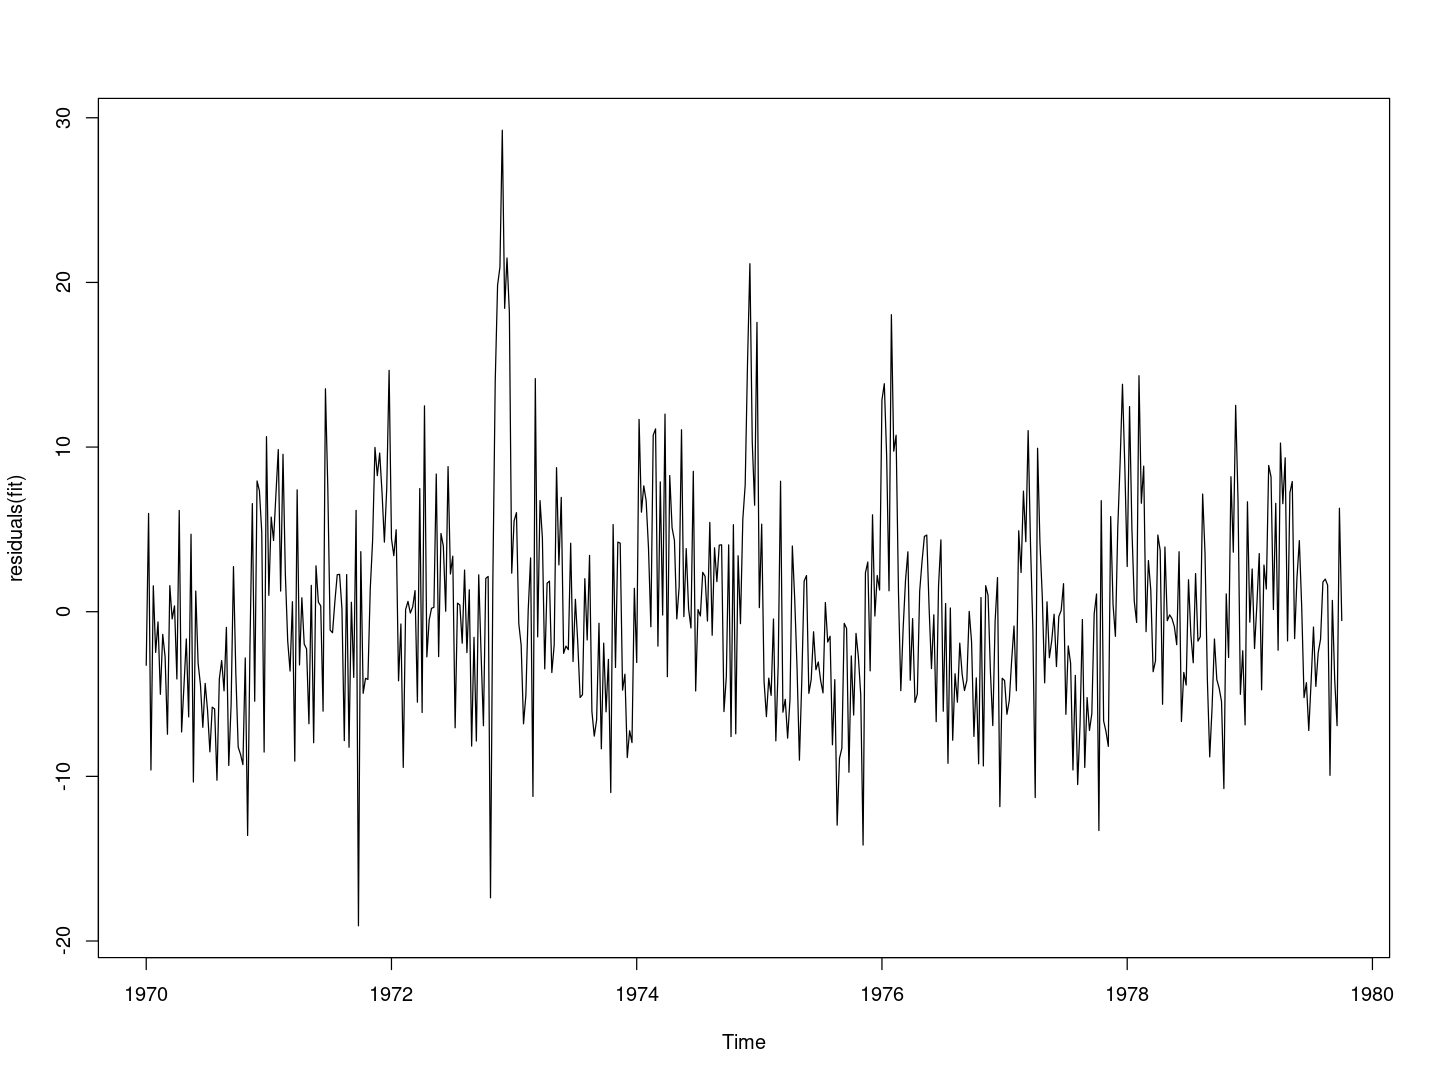

In [8]:
plot(residuals(fit))

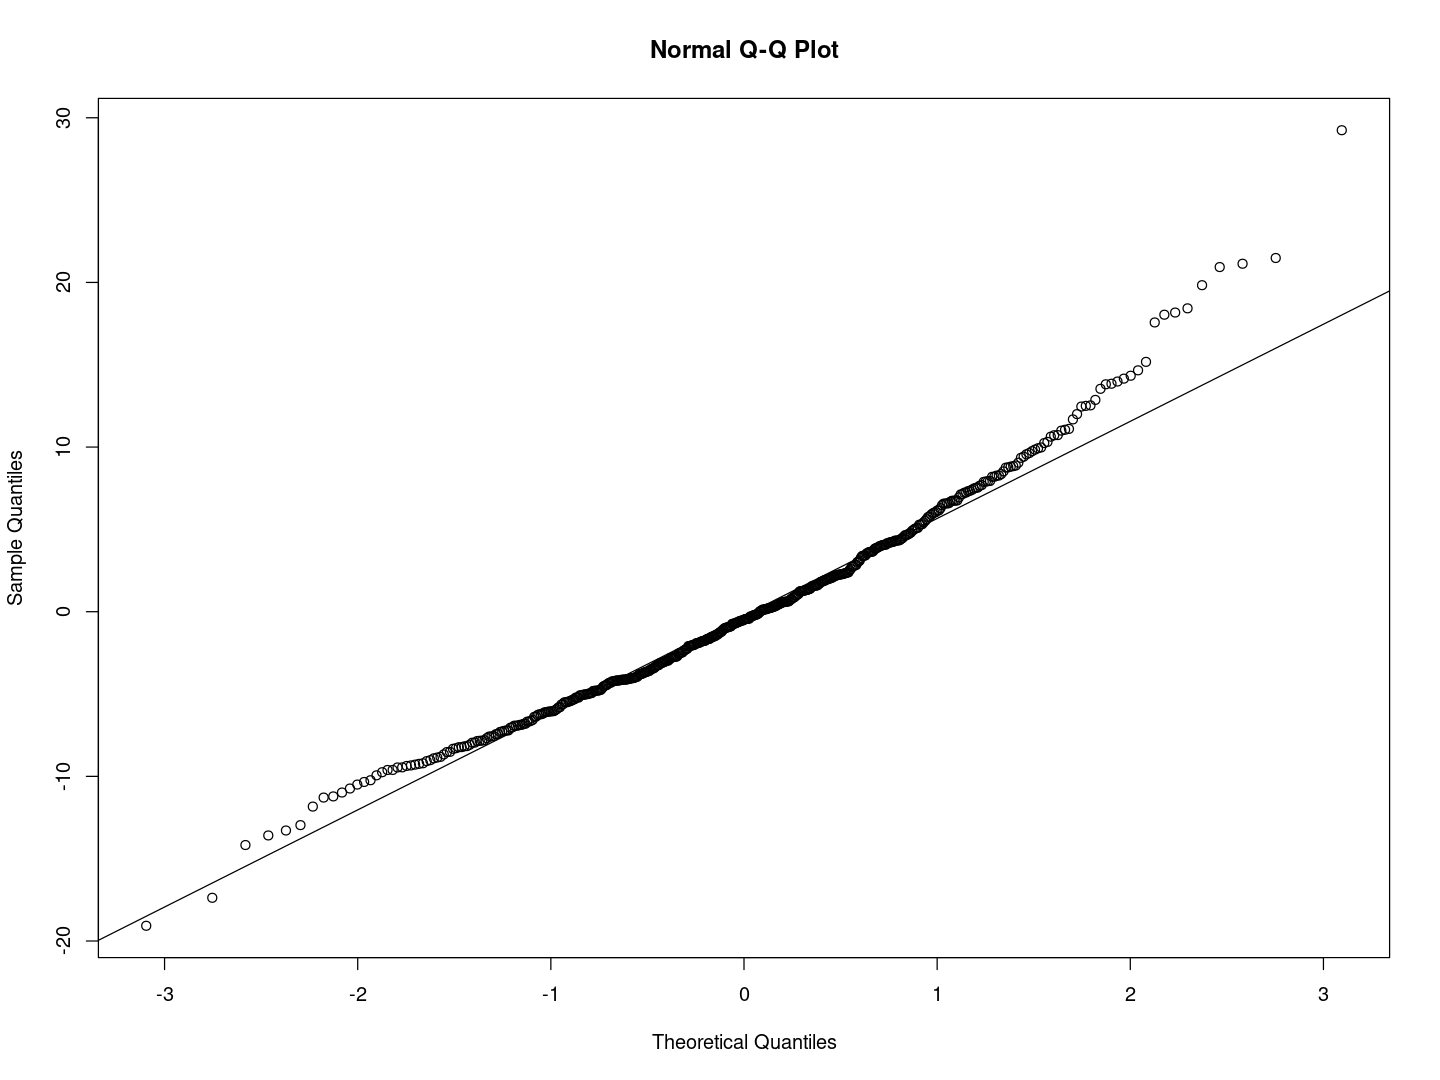

In [9]:
qqnorm(residuals(fit))
qqline(residuals(fit))

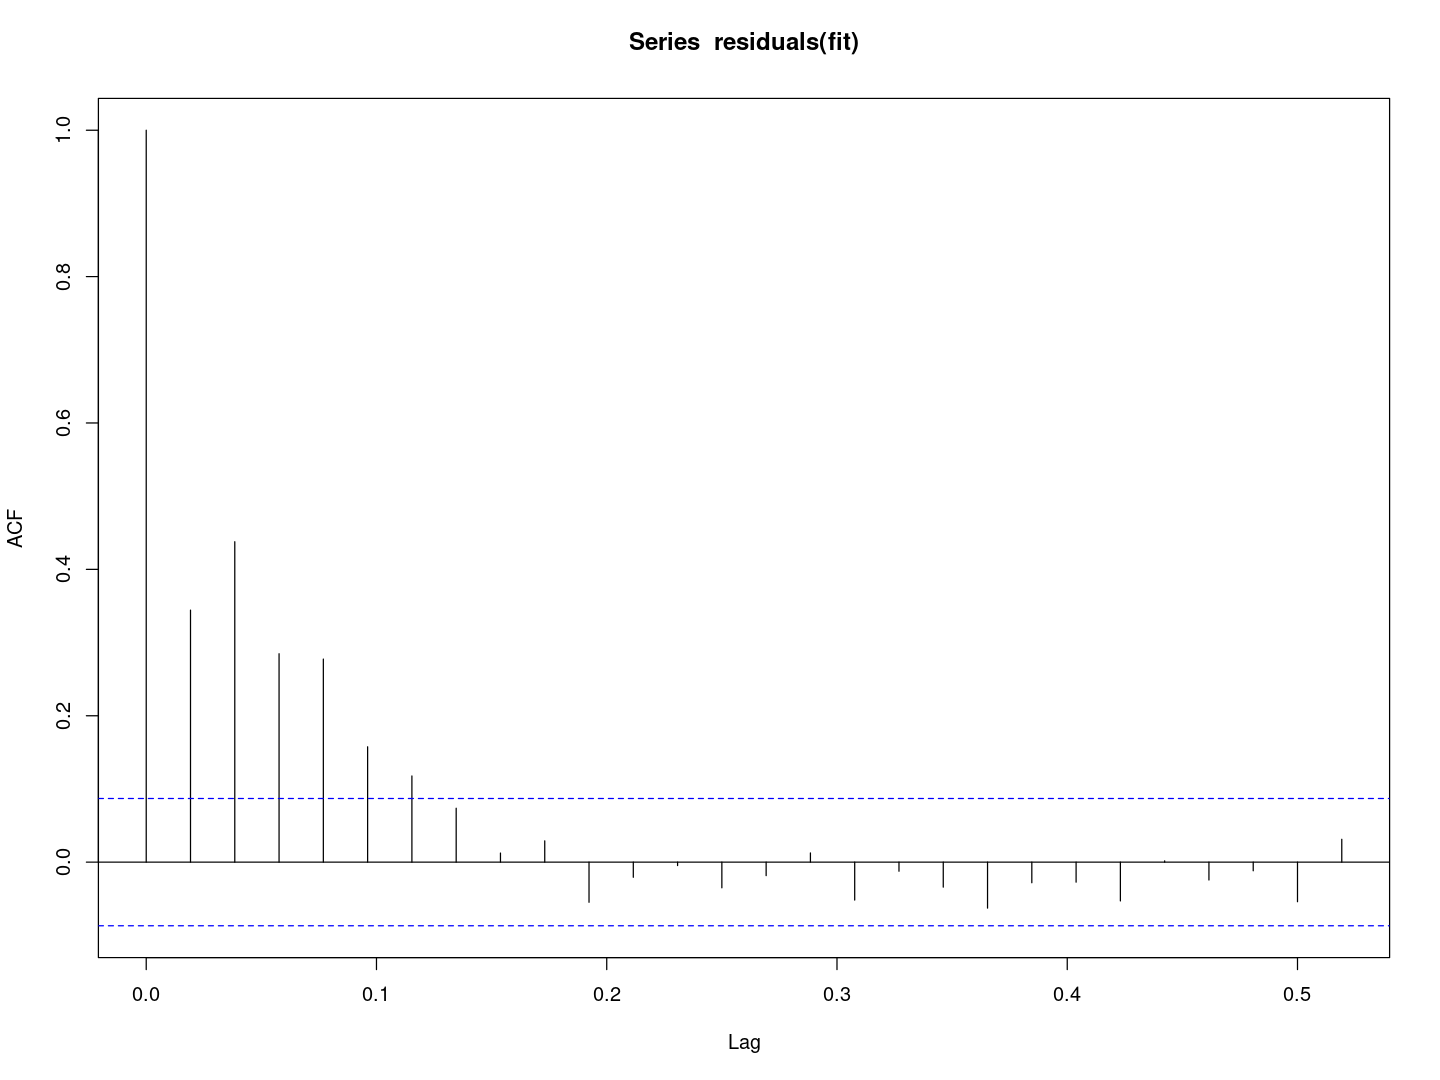

In [10]:
acf(residuals(fit))

In [11]:
#  Modelo 5 (para ver que el AIC/BIC empeora)

temp  = T-mean(T)  # center temperature    
temp2 = temp^2             # square it  
trend = time(M)        # time
P2 = P^2

fit = lm(M ~ trend + temp + temp2 + P + P2, na.action=NULL)
            
summary(fit)       # regression results

num = length(M)                                         # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 


Call:
lm(formula = M ~ trend + temp + temp2 + P + P2, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3240  -4.3247  -0.4491   3.8829  29.2868 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.826e+03  1.997e+02  14.151  < 2e-16 ***
trend       -1.394e+00  1.010e-01 -13.799  < 2e-16 ***
temp        -4.756e-01  3.180e-02 -14.956  < 2e-16 ***
temp2        2.215e-02  2.866e-03   7.727 6.02e-14 ***
P            3.673e-01  1.207e-01   3.043  0.00247 ** 
P2          -1.080e-03  1.150e-03  -0.939  0.34822    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.386 on 502 degrees of freedom
Multiple R-squared:  0.5961,	Adjusted R-squared:  0.5921 
F-statistic: 148.2 on 5 and 502 DF,  p-value: < 2.2e-16


[1] 4.723915

[1] 4.782209

## Ejemplo: Regresión con "lag".

En clases anteriores vimos (a ojo) que existe una relación entre el índice del niño (Southern oscillation index, SOI) y la población de peces (Recruitement).

Recordemos las series:

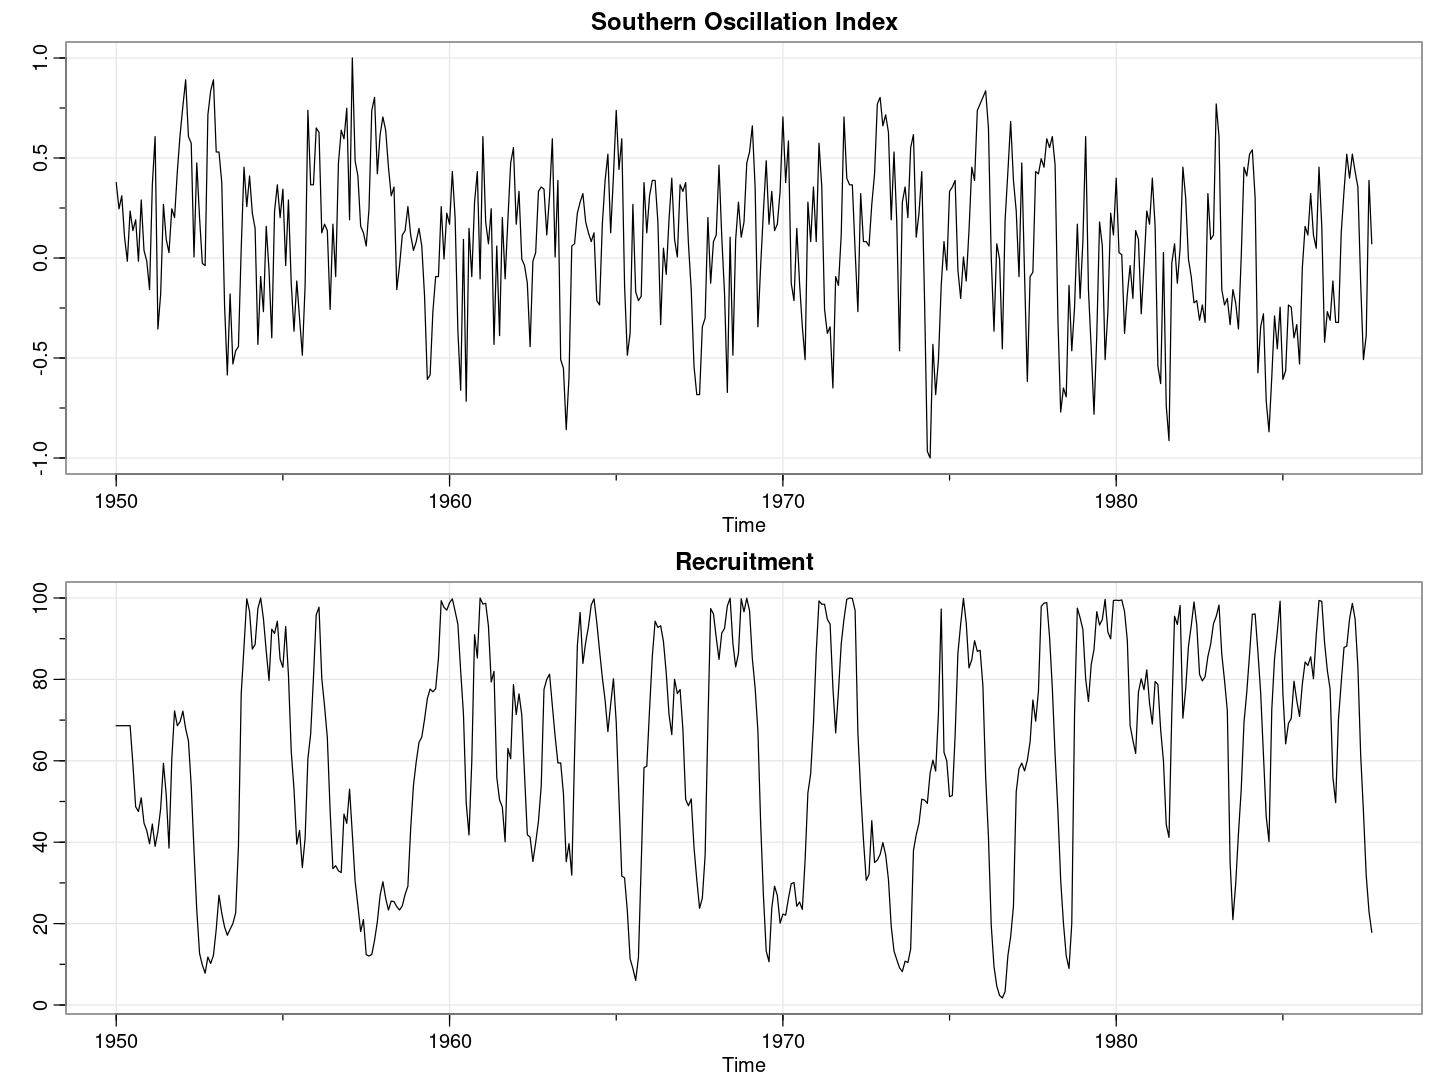

In [12]:
par(mfrow = c(2,1))  # set up the graphics
tsplot(soi, ylab="", main="Southern Oscillation Index")
tsplot(rec, ylab="", main="Recruitment") 

Analicemos la autocorrelación de cada serie, y la correlación cruzada:

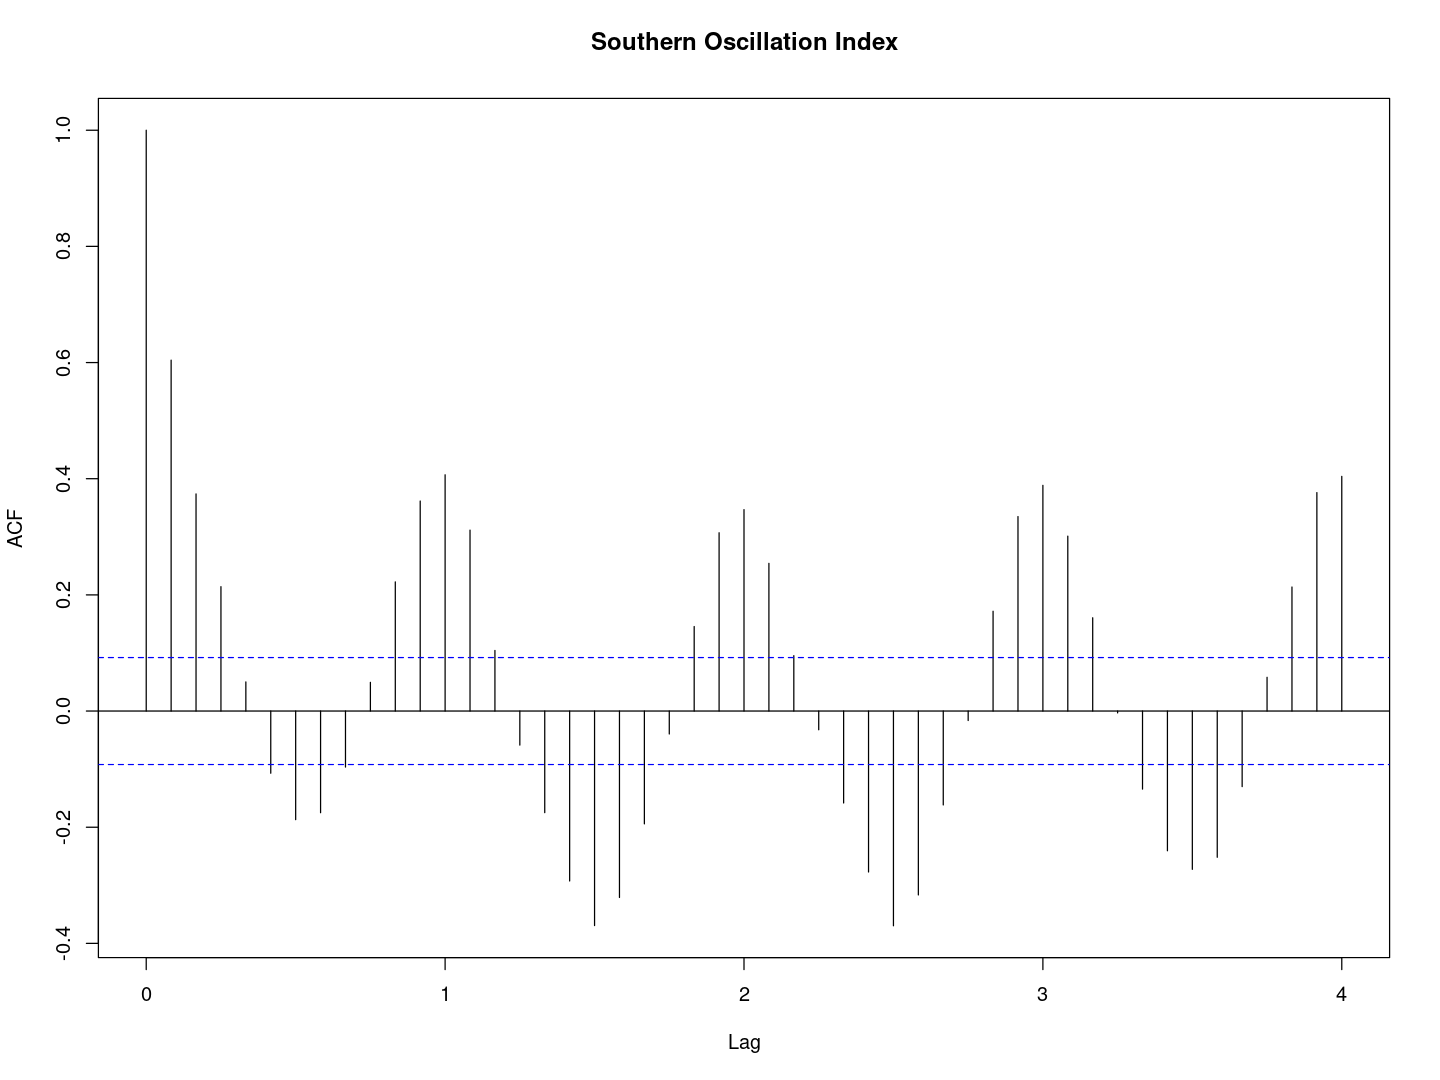

In [13]:
acf(soi, 48, main="Southern Oscillation Index")

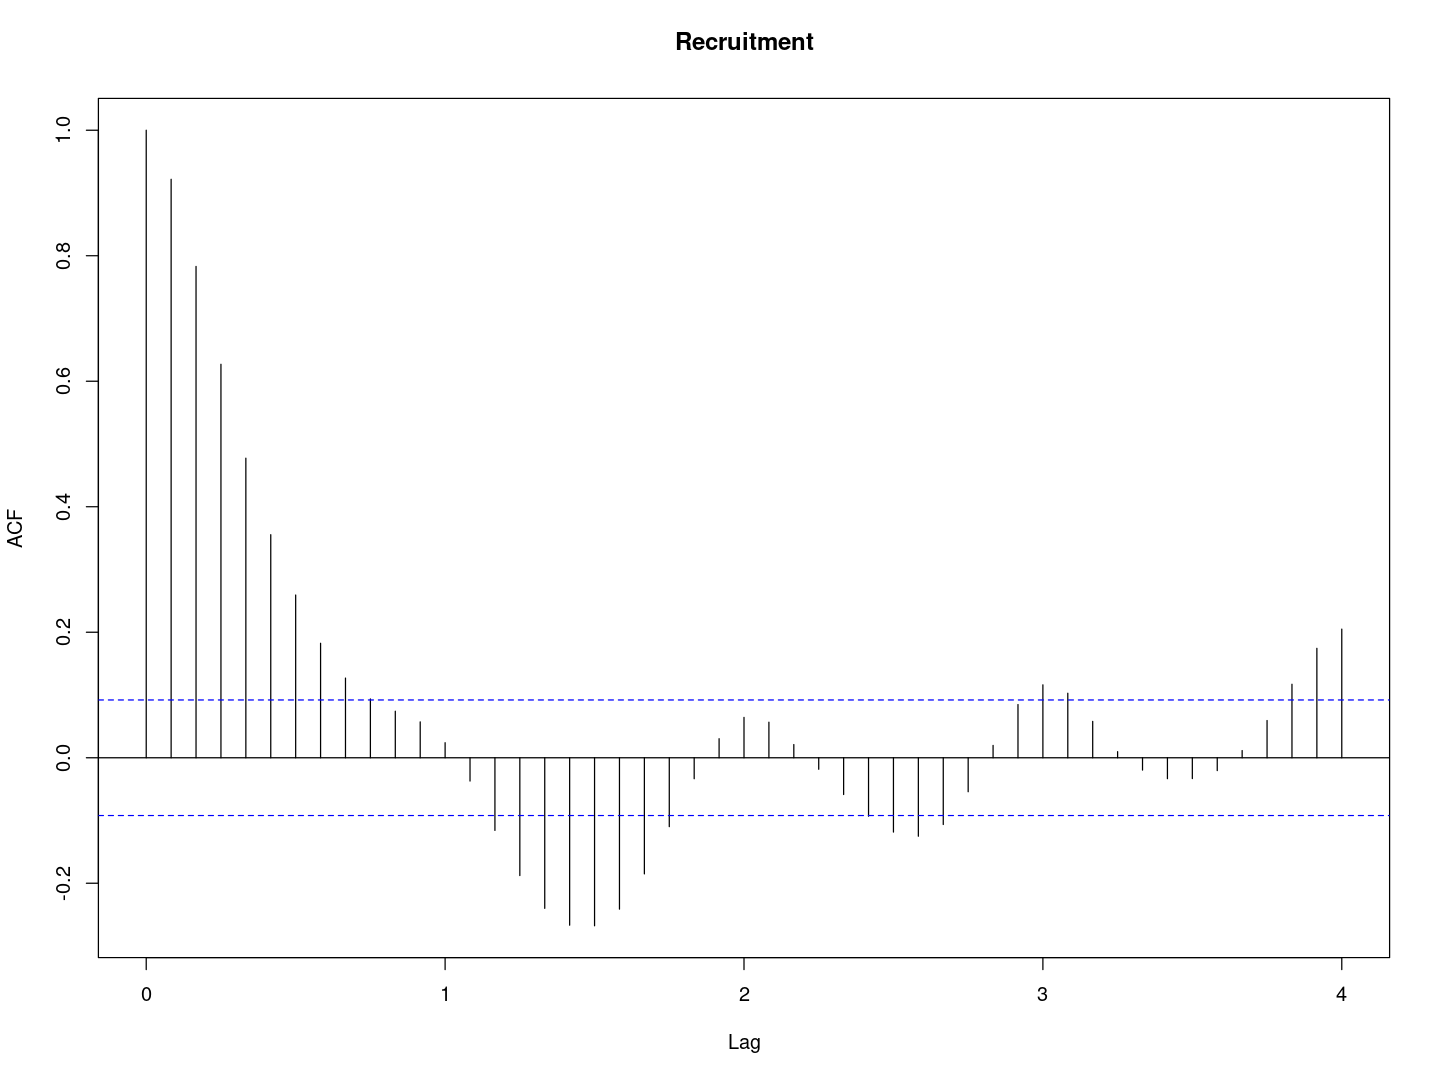

In [14]:
acf(rec, 48, main="Recruitment")

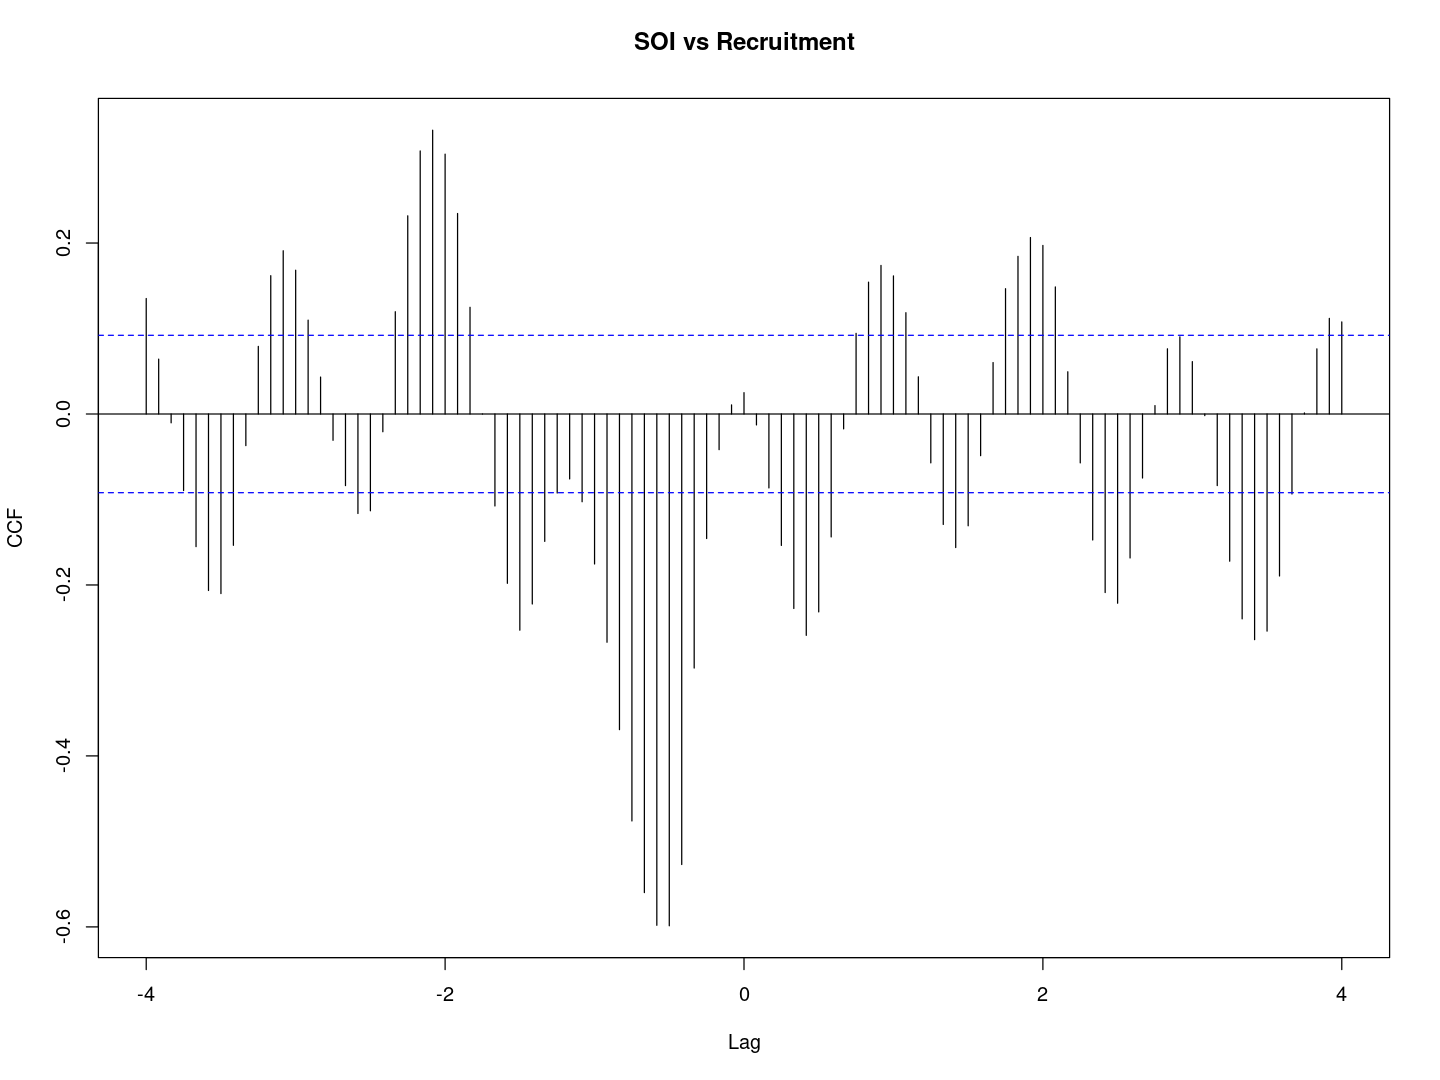

In [15]:
ccf(soi, rec, 48, main="SOI vs Recruitment", ylab="CCF")

### Observaciones:

* La serie del SOI muestra correlaciones fuertes cada 12 meses.
* El libro dice que la de recruitement también pero yo no las veo.
* La correlación cruzada tiene un pico (negativo) en -6 meses. La serie SOI puede predecir la serie de Recruitement usando el valor de 6 meses antes.

Se propone un modelo:

$$R_t = \beta_0 + \beta_1 S_{t−6} + w_t.$$

Es decir, estimar el recruitement actual por una media más algo que depende del SOI 6 meses antes.

*Problema:* como alineamos las series $R$ y $S_{t-6}$.

In [16]:
fish = ts.intersect(rec, soiL6=lag(soi,-6), dframe=TRUE)

In [17]:
summary(fit1 <- lm(rec~soiL6, data=fish, na.action=NULL))


Call:
lm(formula = rec ~ soiL6, data = fish, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.187 -18.234   0.354  16.580  55.790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   65.790      1.088   60.47   <2e-16 ***
soiL6        -44.283      2.781  -15.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.5 on 445 degrees of freedom
Multiple R-squared:  0.3629,	Adjusted R-squared:  0.3615 
F-statistic: 253.5 on 1 and 445 DF,  p-value: < 2.2e-16


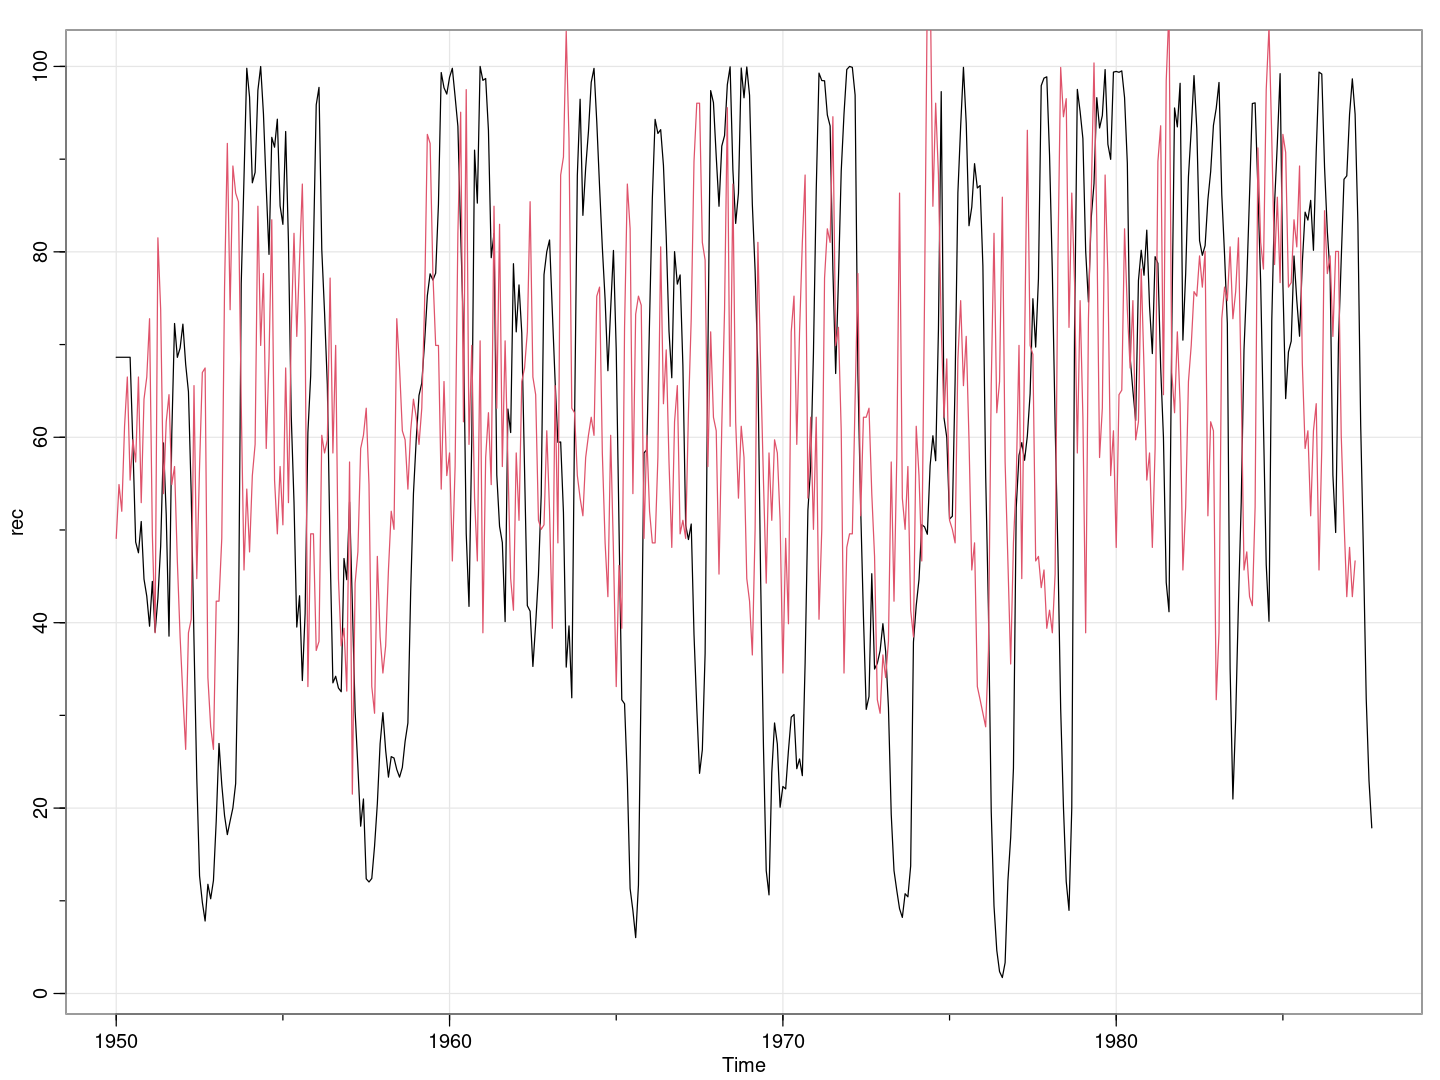

In [18]:
#transformo el resultado en una serie
predictions = ts(fitted(fit1),start=1950, frequency=12)
tsplot(rec)
lines(predictions, col="2")

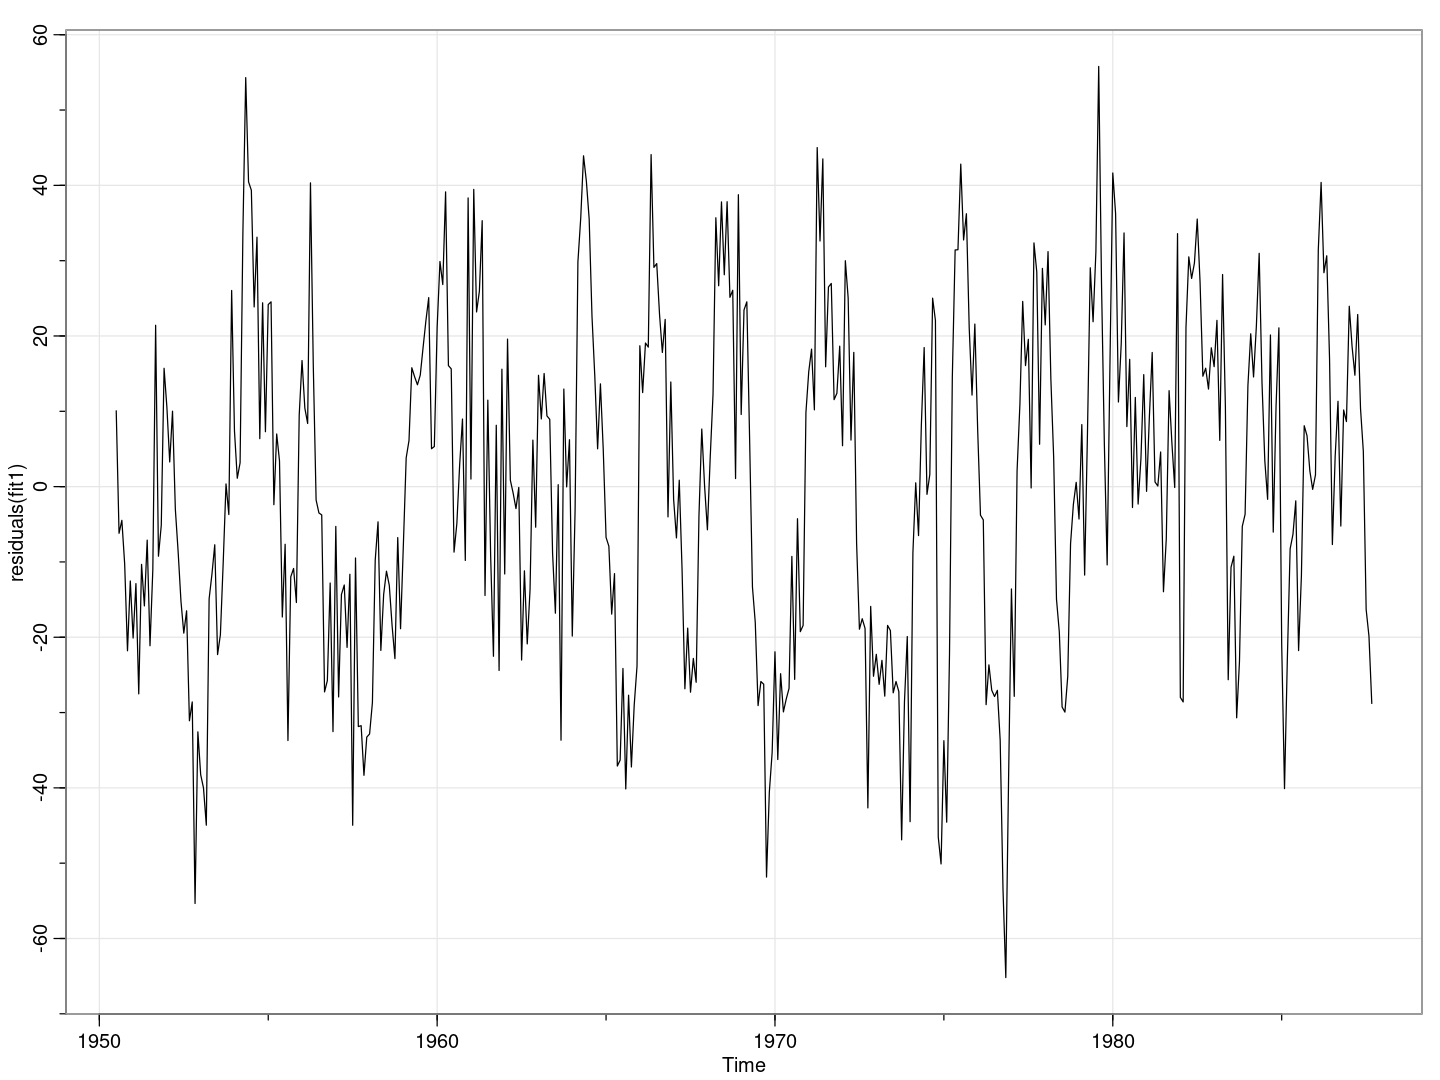

In [19]:
tsplot(residuals(fit1))

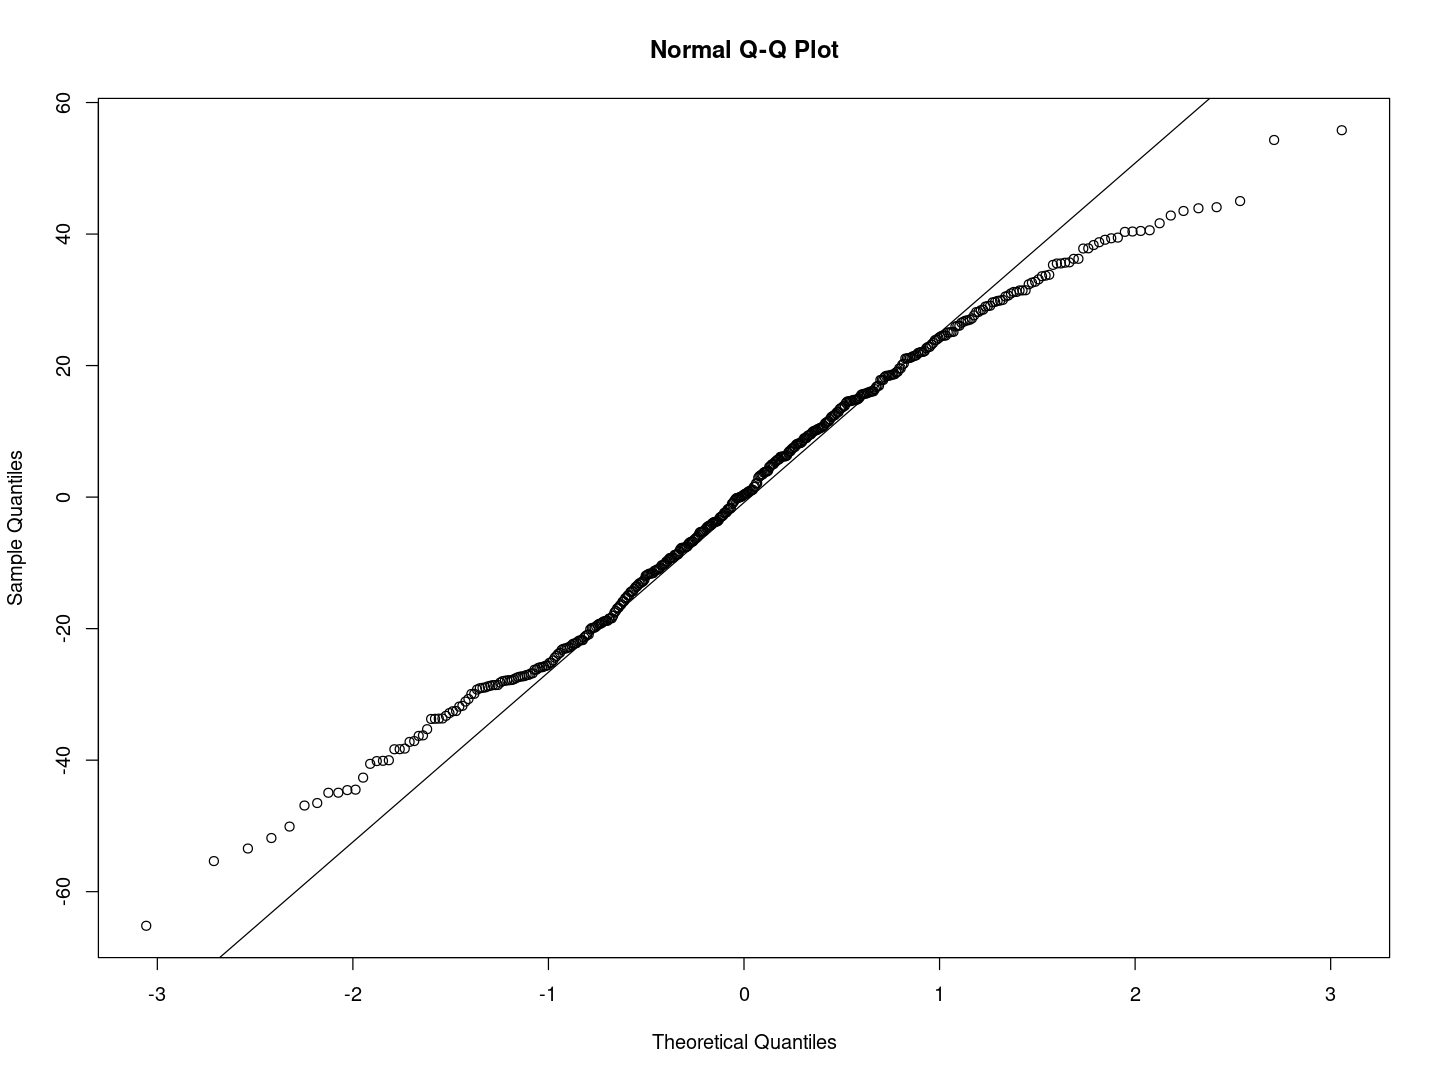

In [20]:
qqnorm(residuals(fit1))
qqline(residuals(fit1))

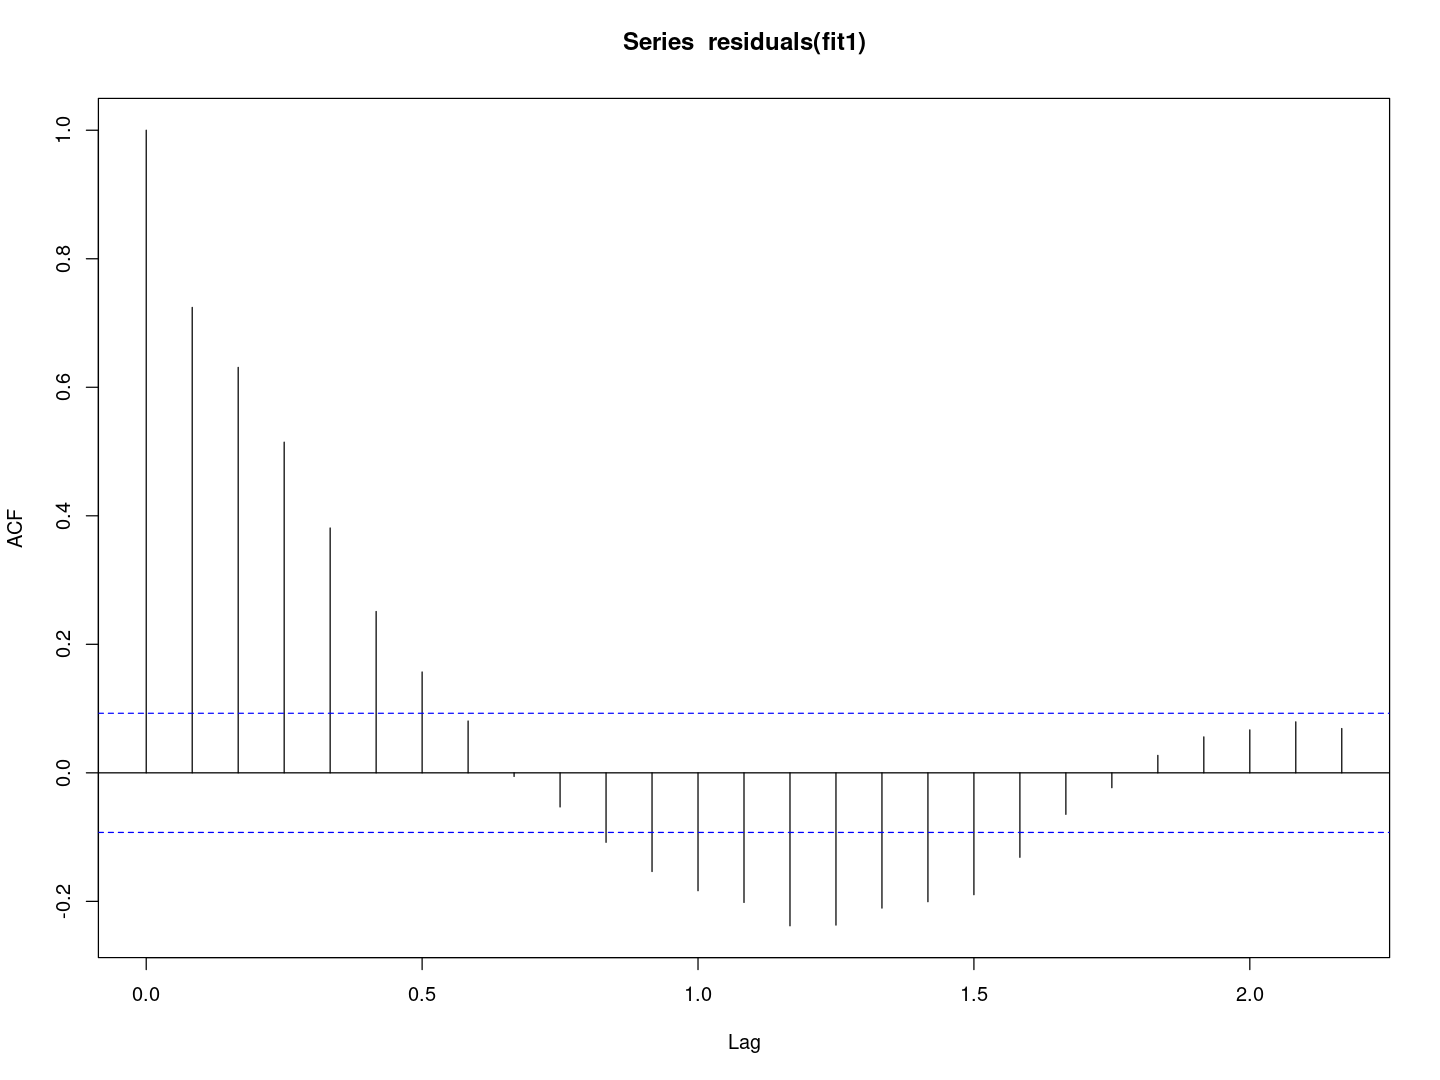

In [21]:
acf(residuals(fit1))

## Componentes estacionales y periodograma

Otra de las componentes que nos gustaría analizar cuando exploramos un ajuste de serie temporal es la presencia de componentes periódicas.

**Ejemplos:**
 1. La mezcla de $\sin$ y $\cos$ del ejercicio del cuaderno pasado.
 2. El SOI visto más arriba (y el recruitement si le creemos al libro).

**Idea:** ¿Como sistematizar el encontrar componentes periódicas?

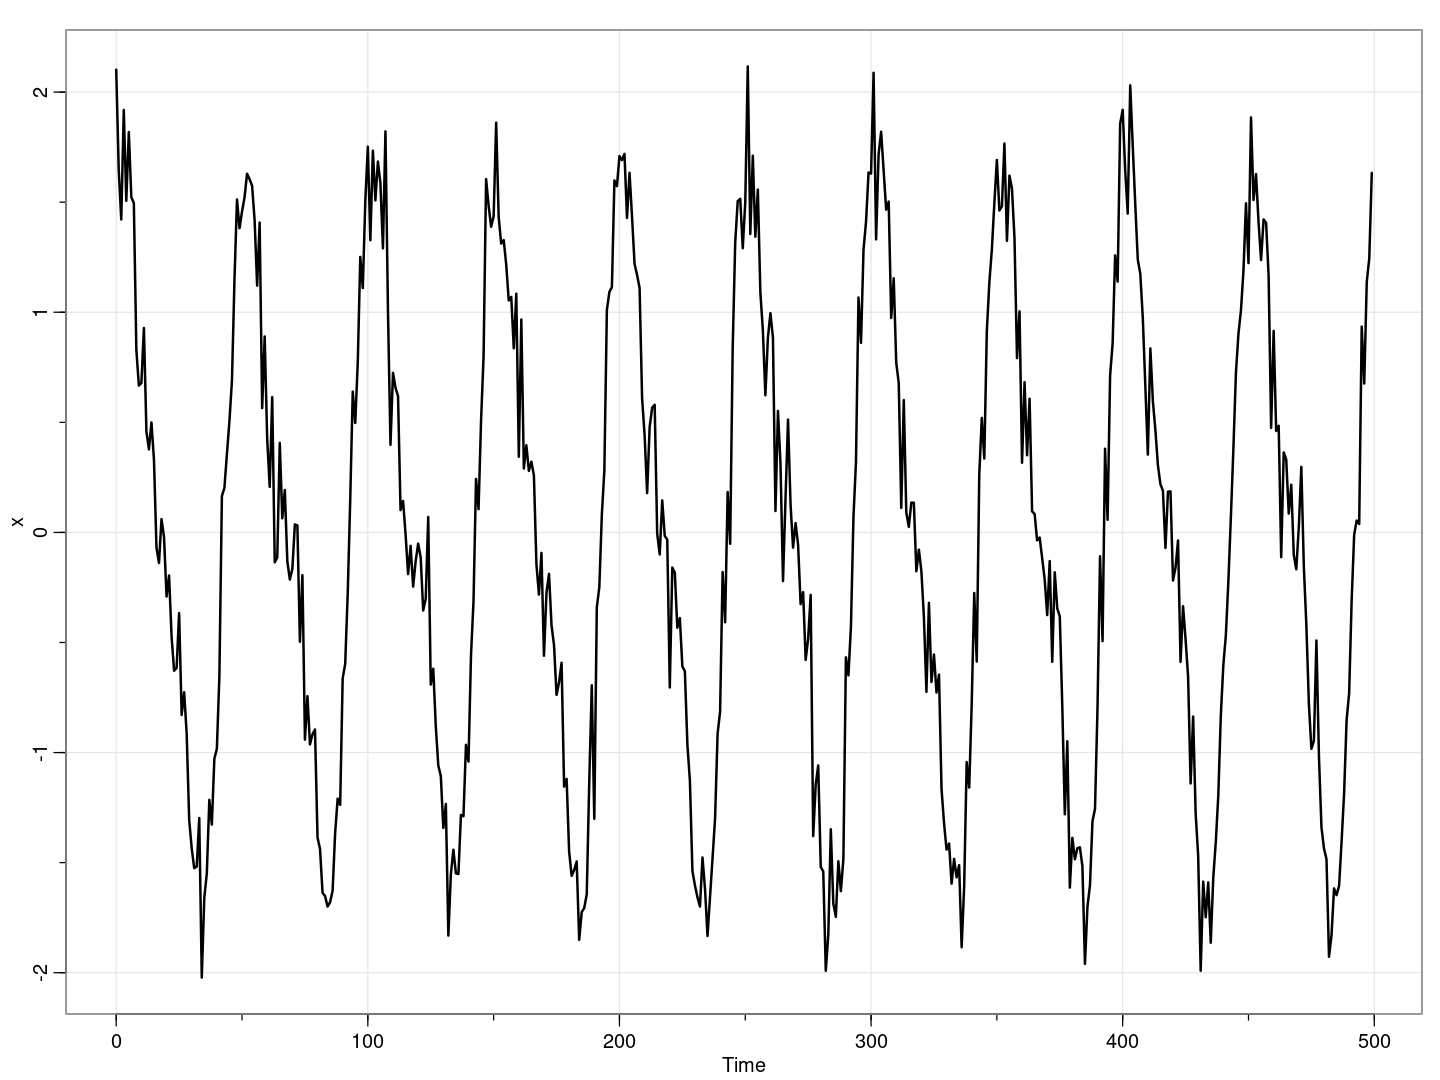

In [22]:
t=seq(1,500, by=1)
s = cos(2*pi*1/50*t) + sin(2*pi*1/50*t) + 0.5*cos(2*pi*2/50*t)
w=rnorm(length(t),0,0.2)
datos=s+w;

x = ts(datos,start=0)

tsplot(x, lwd=2)

### Idea 1:

Calcular la autocorrelación de la señal y ver si aparecen picos. Similar a lo hecho para el SOI arriba.

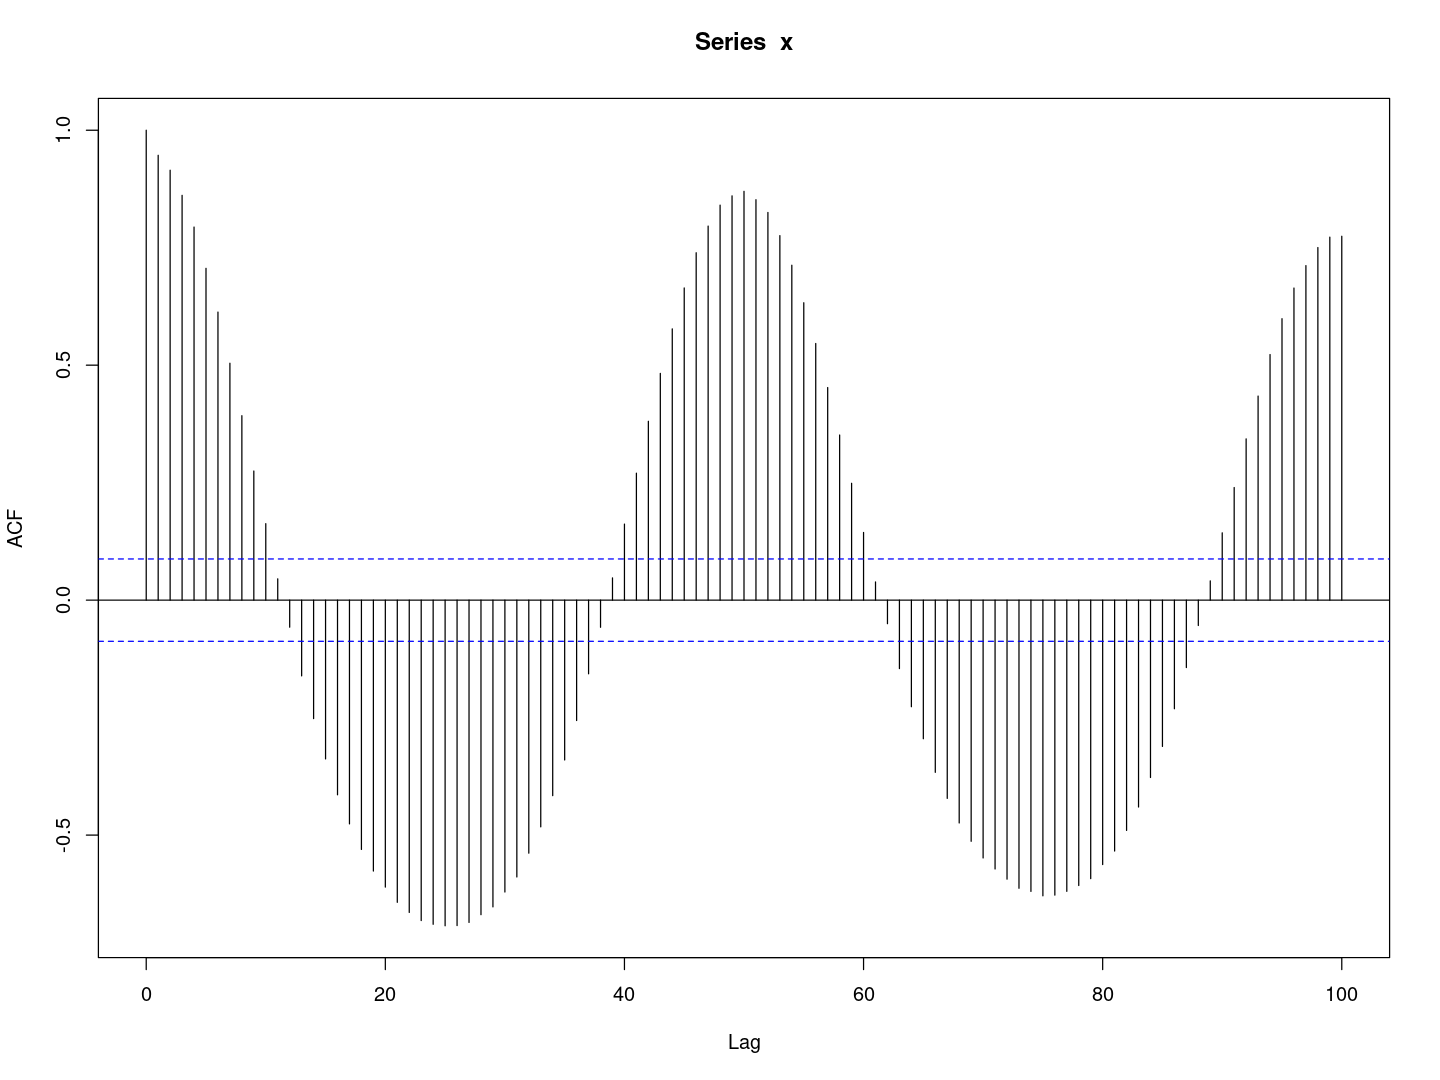

In [23]:
plot(acf(x,lag.max=100))

### Idea 2: correlacionar con una señal de frecuencia conocida

La idea es tomar señales de la forma:

$$ c^f_t = cos(2\pi f t) \quad s^f_t = sin(2 \pi f t).$$

Con $f=j/n$, y $j=0,\ldots,n/2$.

Si el valor $P^f = \rho(x,c^f_t) ^2 + \rho(x,s^f_t)^2$ es alto, esa frecuencia está presente en la señal.

**Ejemplo:**

[1] 500


[1] 0.003719649

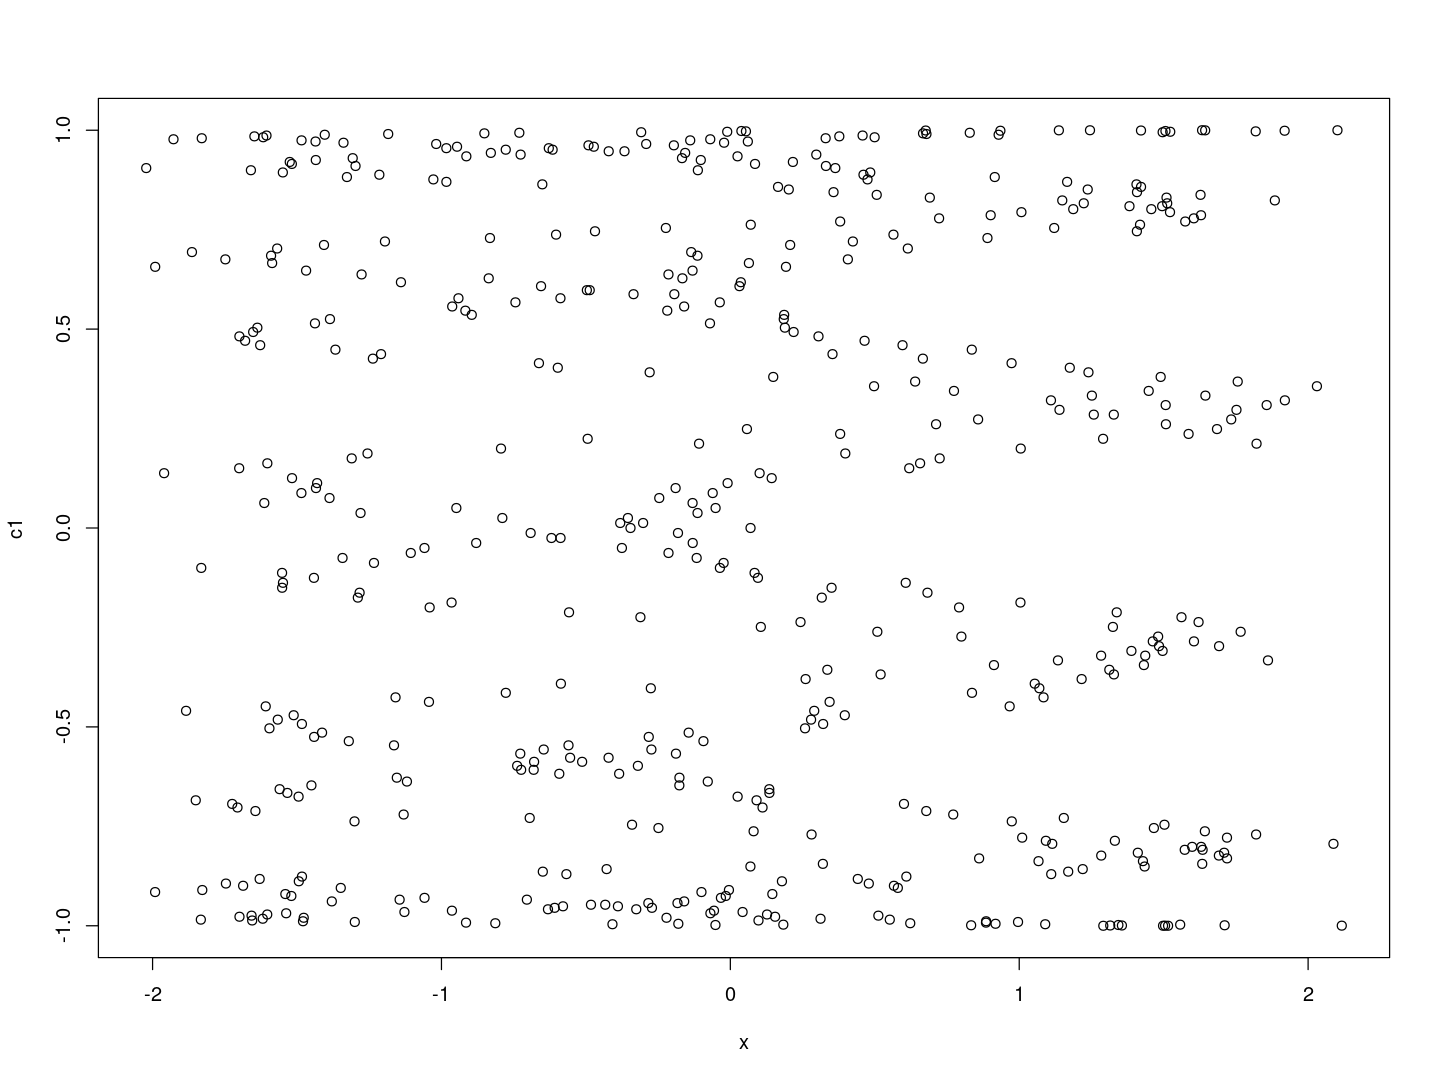

In [24]:
##ejemplo de lo que ocurre al variar la frecuencia
n=length(t)
print(n)
j=1
c1 = cos(2*pi*j/n * t)
plot(x,c1)
cor(x,c1)

El *periodograma* es una forma sistemática de recorrer las correlaciones anteriores y calcular cuáles son significativas.

A su vez, debido a la *FFT: Fast Fourier Transform* muchos de los cálculos usados en una regresión pueden ser reusados para calcular otras, llevando a un algoritmo eficiente.

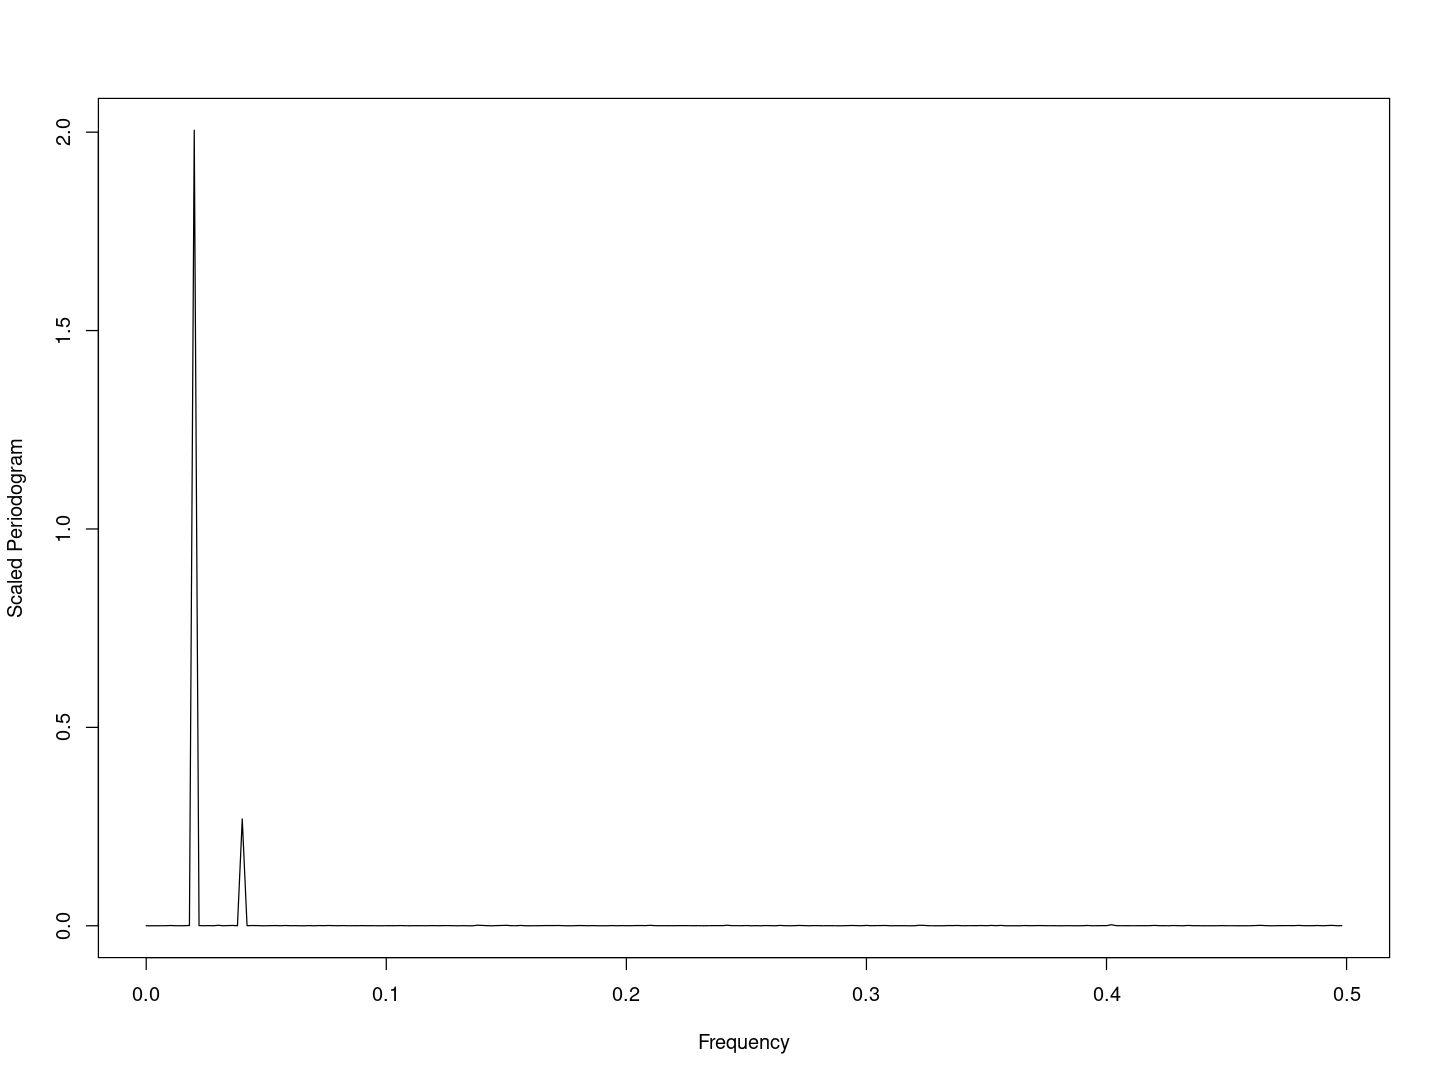

In [25]:
I = abs(fft(x))^2/n # the periodogram
P = (4/n)*I[1:(n/2)]
# the scaled periodogram
f = (0:(n/2-1))/n
# frequencies
plot(f, P, type="l", xlab="Frequency", ylab="Scaled Periodogram")

## Aplicación:

Apliquemos la idea del periodograma al SOI y al Recruitement

In [26]:
s = as.numeric(soi)
n=length(s)

I = abs(fft(s))^2/n # the periodogram

I=I[1:floor(n/2)]
f = (0:(n/2-1))/n*12 ##El *12 es para llevarlo a la frecuencia original de la serie.

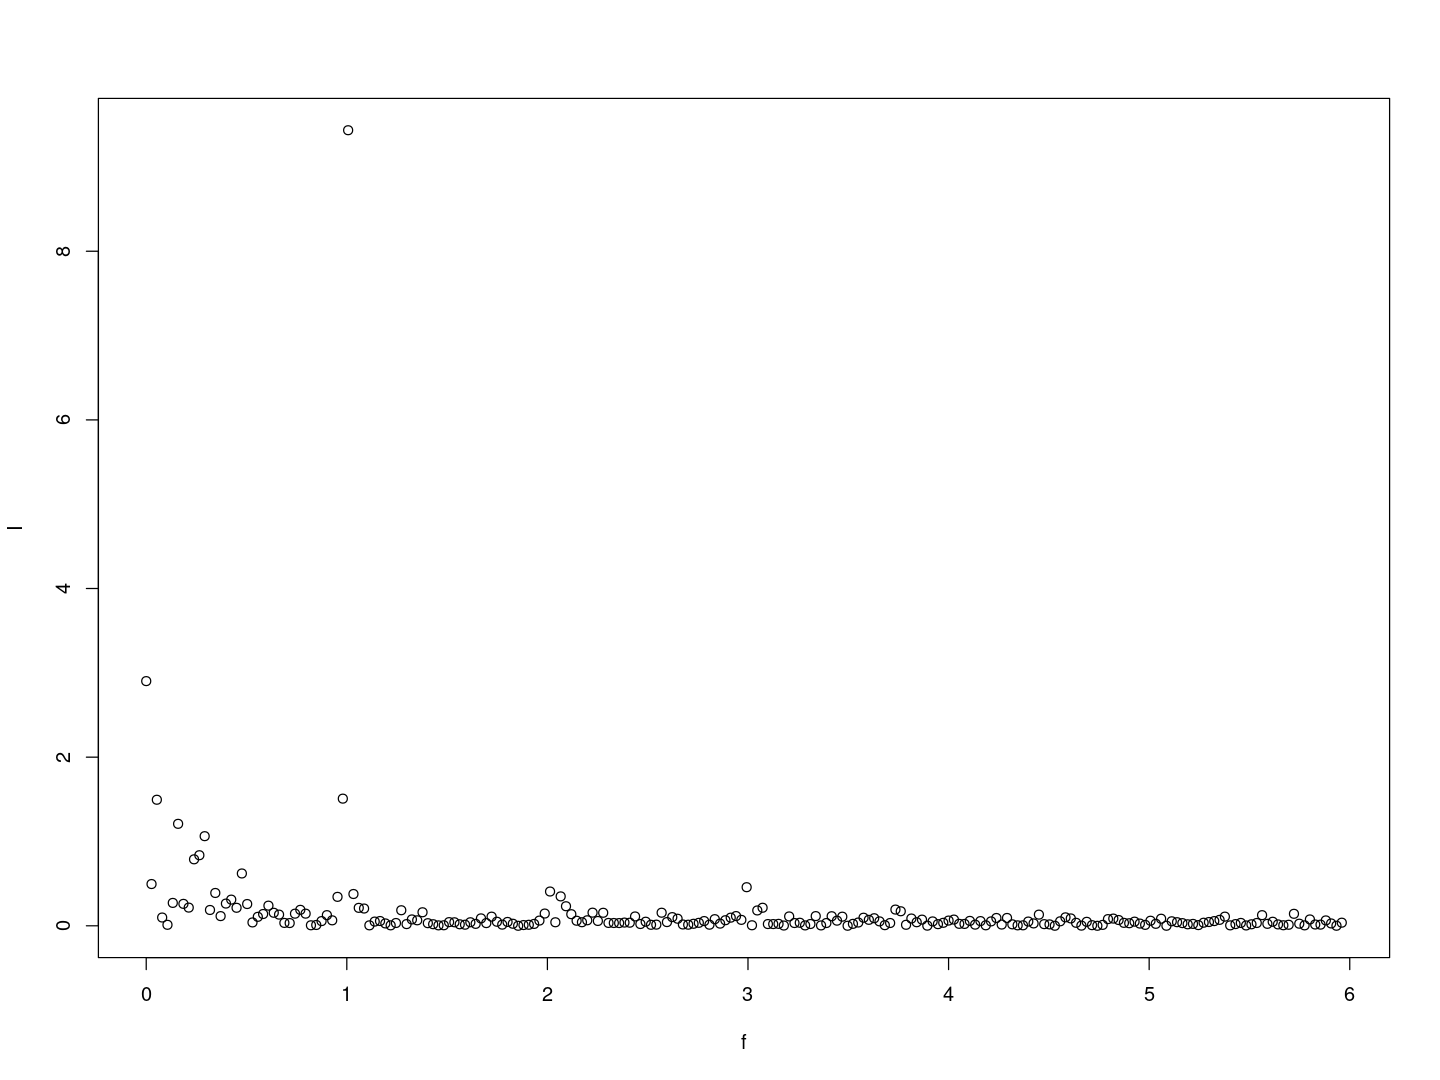

In [27]:
plot(f,I)

In [28]:
r = as.numeric(rec)
n=length(rec)

I = abs(fft(r))^2/n # the periodogram
I=I[1:floor(n/2)]
f = (0:(n/2-1))/n*12 ##E

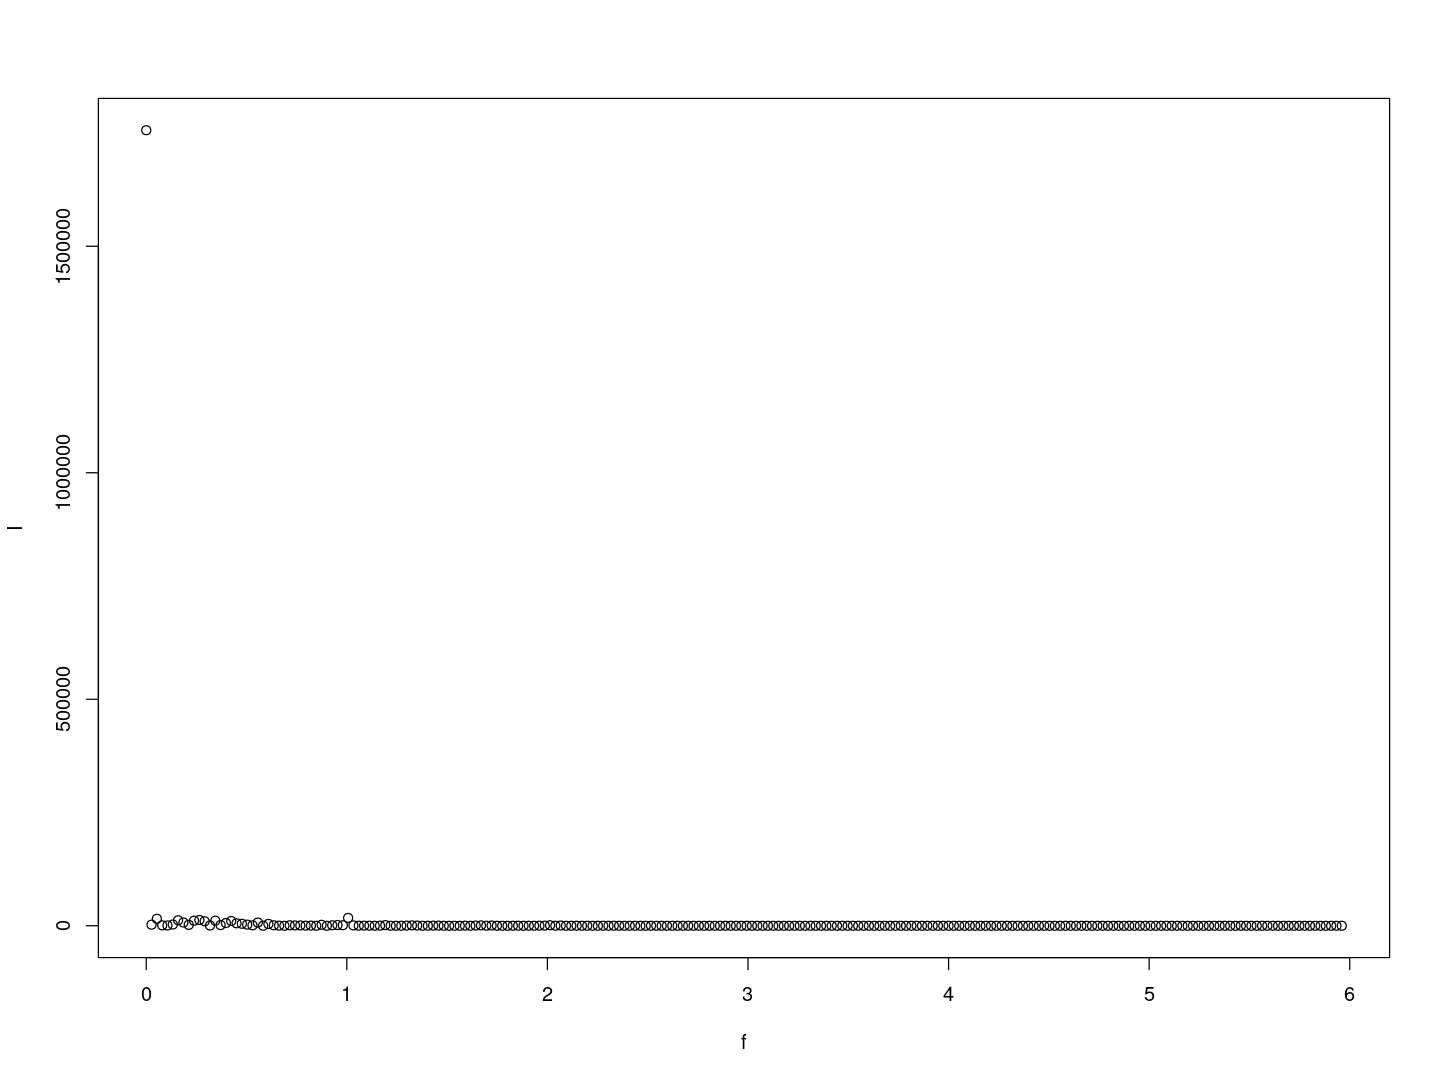

In [29]:
plot(f,I)

## Regresión no lineal

Cuando el modelo es no lineal, ¿qué podemos hacer?

**Ejemplo:** En el caso de la combinación de $\sin$ y $\cos$ ya sabíamos la frecuencia, pero si la dejamos libre el modelo:

$$x_t = \beta_1 \cos(2\pi f t) + \beta_2 \sin(2\pi f t)$$

pasa a ser no lineal

### Idea: aplicar el mismo criterio de mínimos cuadrados

Es decir si tengo una aproximación no lineal $y_t(\beta)$ donde los parámetros son la incógnita, resolver:

$$\min_\beta \sum_{t=1}^n (x_t - y_t(\beta))^2$$

**Problema:** la optimización anterior no necesariamente es fácil de hacer. No hay garantías de convexidad, puede tener mínimos locales.

El algoritmo más utilizado para resolver el problema anterior es el de *Gauss-Newton* que converge a un mínimo local. Si tenemos una buena aproximación inicial de la solución converge.

En R, esto se hace mediante la función `nls`.

## Ejercicio [2.9 del libro]

En este ejercicio, se busca explorar la naturaleza periódica de $S_t$, la serie SOI ya analizada.

1. Quitar la tendencia a las serie mediante una regresión lineal en la componente tiempo. ¿Hay una tendencia significativa en la temperatura de superficie?

2. Calcular el periodograma para la serie sin tendencia (residuos) de la parte anterior. Identificar las frecuencias principales (una obvia es la anual). ¿Cuál es el ciclo probable del fenómeno del Niño que refleja el pico más pequeño?


## Ejercicio [2.10 del libro]

Considere las dos series semanales `oil` (precio del petróleo) and `gas` (precio del combustible). La primera está en dólares por barril, la segunda en centavos por galón.

1. Graficar ambas en una misma gráfica. ¿Cuál de los modelos ya vistos se asemeja más? ¿Son estacionarias?

2. En economía, muchas veces la información se encuentra en el porcentaje de cambio de la serie (retorno o tasa de crecimiento). Argumente que la transformación $y_t= \log(x_t) - \log(x_{t-1})$ puede usarse para obtener el retorno.

3. Aplicar la transformación a las series anteriores, volver a graficar y analizar la autocorrelación de las mismas.

4. Graficar la correlación cruzada de las series transformadas. Los valores pequeños pero significativos donde gas adelanta a oil pueden ser considerados "realimentación" entre ellas.

5. Realizar nubes de puntos para las series laggeadas, con hasta 3 semanas de diferencia.

6. Hay estudios que afirman que los precios de combustible responden más rápido a las subidas del petróleo que a las bajadas. Para explorar esto hagamos una regresión con lags simple. 

Sean $G_t$ y $O_t$ las series transformadas de gas y oil respectivamente. Ajuste una regresión:

$$G_t = \alpha_1 + \alpha_2 I_t + \beta_1 O_t + \beta_2 O_{t−1} + w t,$$

siendo $I_t = 1$ si $O_t \geqslant 0$ y $0$ si no ($I_t$ representa si oil está creciendo). Sugerencia: construir $I$ como `indi = ifelse(poil < 0, 0, 1)`

Analizar y discutir los resultados.

## Ejercicio

Analizar el uso de la función `nls` para hacer una ajuste de *regresión logística* a la serie de poblaciones de Australia entre 1778 y 2005 que se brinda a continuación.

La función logística de parámetros $A$, $b$ y $t_0$ tiene la siguiente expresión:

$$f(t;A,b,t_0) = \frac{A}{1+e^{-b(t-t_0)}}$$

Los parámetros representan:
* $A$: el valor asintótico.
* $b$: la velocidad de transición de $0$ a $A$.
* $t_0$: el tiempo de transición (donde vale $A/2$).


In [30]:
growth <- c(859, 645, 2056, 2873, 3264, 3514, 3579, 3466, 4100, 4344, 
    4588, 5088, 5217, 5945, 7014, 7238, 7598, 7707, 7910, 8794, 10263, 11560, 
    11566, 11875, 12630, 13957, 14086, 15063, 17553, 21192, 25859, 31472, 33543, 
    35492, 37364, 40632, 48072, 52505, 53882, 56300, 58197, 61934, 70039, 75981, 
    83937, 98095, 105556, 113354, 125120, 134488, 151868, 169939, 190408, 220968, 
    240984, 250848, 264287, 279148, 293249, 308797, 332328, 373362, 405356, 
    437665, 513796, 600992, 694917, 793260, 876729, 970287, 1050828, 1097305, 
    1145585, 1168149, 1206918, 1259292, 1325183, 1390043, 1443955, 1483848, 
    1539552, 1592157, 1647756, 1700888, 1742847, 1794520, 1849392, 1898223, 
    1958679, 2031130, 2092164, 2162343, 2231531, 2306736, 2388082, 2505736, 
    2605725, 2694518, 2788050, 2881362, 2981677, 3062477, 3151355, 3240985, 
    3305753, 3361895, 3426760, 3491621, 3553098, 3617783, 3664715, 3715988, 
    3765339, 3824913, 3875318, 3916592, 3974150, 4032977, 4091485, 4161722, 
    4232278, 4323960, 4425083, 4573786, 4746589, 4893741, 4971778, 4969457, 
    4917949, 4982063, 5080912, 5303574, 5411297, 5510944, 5637286, 5755986, 
    5882002, 6003027, 6124020, 6251016, 6355770, 6436213, 6500751, 6552606, 
    6603785, 6656695, 6707247, 6755662, 6810413, 6871492, 6935909, 7004912, 
    7077586, 7143598, 7201096, 7269658, 7347024, 7430197, 7517981, 7637963, 
    7792465, 8045570, 8307481, 8527907, 8739569, 8902686, 9089936, 9311825, 
    9530871, 9744087, 9947358, 10160968, 10391920, 10642654, 10846059, 11055482, 
    11280429, 11505408, 11704843, 11912253, 12145582, 12407217, 12663469, 13198380, 
    13409288, 13614344, 13831978, 13968881, 14110107, 14281533, 14430830, 14602481, 
    14807370, 15054117, 15288891, 15483496, 15677282, 15900566, 16138769, 16394641, 
    16687082, 16936723, 17169768, 17387023, 17581284, 17759999, 17951481, 18196054, 
    18420320, 18609115, 18814276, 19038338, 19272644, 19533972, 19770963, 20011882, 
    20252132, 20544064)
years <- c(1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 
    1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 
    1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 
    1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 
    1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 
    1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 
    1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 
    1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 
    1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 
    1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 
    1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 
    1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 
    1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
    1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
    1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
    1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
    1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
    1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
    2001, 2002, 2003, 2004, 2005)

population <- data.frame(growth, years)